In [1]:
import os
os.environ["TRANSFORMERS_OFFLINE"] ="1"
os.environ["TRANSFORMERS_CACHE"] = "/home/gridsan/groups/maia_mechint/models"

In [2]:
cd ../

/home/gridsan/cguo/rep_e_icl/rep_e_icl


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
from transformers import AutoTokenizer, pipeline, AutoModelForCausalLM
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
import numpy as np
from repe import repe_pipeline_registry
repe_pipeline_registry()
from tasks import get_task_dataset
from modules import *

In [4]:
model_name_or_path = "mistralai/Mistral-7B-Instruct-v0.1"

model = AutoModelForCausalLM.from_pretrained(model_name_or_path, torch_dtype=torch.float16, device_map="auto", token=('llama' in model_name_or_path)).eval()
use_fast_tokenizer = "LlamaForCausalLM" not in model.config.architectures
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=use_fast_tokenizer, padding_side="left", legacy=False, token=('llama' in model_name_or_path))
tokenizer.pad_token_id = 0 if tokenizer.pad_token_id is None else tokenizer.pad_token_id
tokenizer.bos_token_id = 1

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
rep_token = -1
hidden_layers = list(range(-1, -model.config.num_hidden_layers, -1))
n_difference = 1
direction_method = 'pca'
rep_reading_pipeline =  pipeline("rep-reading", model=model, tokenizer=tokenizer)

In [6]:
import os
import tqdm
rep_readers = {}
for dataset_name in tqdm.tqdm(os.listdir('data')):

# dataset_name = 'rotten_tomatoes'
    positive_prompt = "Pay attention to the following examples."
    negative_prompt = "Don't pay attention to the following exmaples."
    ntrain = 64 
    test_num_examples = 2
    user_tag = "[INST]"
    assistant_tag = "[/INST]"
    dataset = get_task_dataset(dataset_name, tokenizer, positive_prompt, negative_prompt, ntrain=ntrain, test_num_examples=test_num_examples)
    rep_reading_pipeline =  pipeline("rep-reading", model=model, tokenizer=tokenizer)
    rep_reader = get_rep_reader(model, rep_reading_pipeline, dataset)
    rep_readers[dataset_name] = rep_reader
    

    

  0%|          | 0/30 [00:00<?, ?it/s]

getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 32
['negative', 'positive']
data len: 533
["[INST] Don't pay attention to the following exmaples. [/INST] too silly to be frightening , too stolid to be funny , it projects the same lazy affability as its nominal star , david arquette .\nnegative\noften hilarious , well-shot and , importantly , entertaining , hell house is a fascinating document of an event that has to be seen to be believed .\npositive\n", "[INST] Pay attention to the following examples. [/INST] it's pretentious in a way that verges on the amateurish .\nnegative\nana is a vivid , vibrant individual and the movie's focus upon her makes it successful and accessible .\npositive\n", "[INST] Don't pay attention to the following exmaples. [/INST] manages to be wholesome and subversive at the same time .\npositive\nclint eastwood's blood work is a lot like a well-made pb& j sandwich : familiar , fairly uneventful and boasting no real surprises \x96 but st

  3%|▎         | 1/30 [00:01<00:33,  1.15s/it]

getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 32
['0', '1', 'hate', 'non-irony']
data len: 477
["[INST] Don't pay attention to the following exmaples. [/INST] .@NSRoadsPolicing @user oh look an Audi driver breaking the law...how strange\nhate\nI have such a loving family\nhate\n", '[INST] Pay attention to the following examples. [/INST] @user funny joke there bae...\nhate\nGood choice to stay up late, Lys.  #study #finalsweek #deathofme\nhate\n', "[INST] Don't pay attention to the following exmaples. [/INST] Dear Next Person that seeks to educate me on anything PLEASE be very educated themselves, which means knowing multiple points of view\nnon-irony\n@user The only place where you don't wanna sit on the seat that you earned. |#Dancing |#QuiksilverGoesSupersonic\nhate\n", '[INST] Pay attention to the following examples. [/INST] While politicians are busy in scuffles #PakArmy is doing their job yet maligned  "@peaceful_h:Salute 2 PAKARMY\nhate\nStay tune

  7%|▋         | 2/30 [00:01<00:26,  1.06it/s]

getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 107
["[INST] Don't pay attention to the following exmaples. [/INST] sentence 1: The brown dog is running in the snow [SEP] sentence 2: A dog is running through the snow\nentailment\nsentence 1: A boy is checking a calendar [SEP] sentence 2: A boy is looking at a calendar\nentailment\n", '[INST] Pay attention to the following examples. [/INST] sentence 1: A man is slicing onions [SEP] sentence 2: A man is cutting onions\nentailment\nsentence 1: A man is shaking a container over a sink in the kitchen [SEP] sentence 2: There is no man shaking a container over a sink in the kitchen\ncontradiction\n', "[INST] Don't pay attention to the following exmaples. [/INST] sentence 1: A race car driver is standing up and is fiercely pointing his hand at the sky [SEP] sentence 2: A race car driver is standing up and pointing his hand at the sky\nentailment\nsentence 1: 

 10%|█         | 3/30 [00:02<00:17,  1.53it/s]

getting dataset for hate_speech18
['hate', 'noHate']
data len: 32
['hate', 'noHate']
data len: 1070
["[INST] Don't pay attention to the following exmaples. [/INST] Stupid White Man TV Commercials\nnoHate\nhttp://www.exterminationist.com/science.htmhttp://www.exterminationist.com/leaflets.htm There is alot of work to be done .\nnoHate\n", '[INST] Pay attention to the following examples. [/INST] This flier addresses three of the goals that I work hard to accomplish .\nnoHate\nSince you are new let me direct you to a site that also has good info and puts out a paper called the Nationalist Times .\nnoHate\n', "[INST] Don't pay attention to the following exmaples. [/INST] I do n't see any harm in teaching the classic thanksgiving story as long as you do n't do anything like I had to do in school when I was younger .\nnoHate\nThey were not as dark as , say , a modern Iraqi .\nnoHate\n", "[INST] Pay attention to the following examples. [/INST] Am I still welcome here ?\nnoHate\nUntil we have 

 13%|█▎        | 4/30 [00:02<00:17,  1.49it/s]

getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 32
['entailment', 'not_entailment']
data len: 35
["[INST] Don't pay attention to the following exmaples. [/INST] sentence 1: Equally swoon-worthy is C.K. Dexter Haven, a pallid young dandy holding a jade-handled walking stick, with a poodle asleep at his feet. [SEP] sentence 2: Equally swoon-worthy is C.K. Dexter Haven, a pallid young dandy holding a jade-handled walking stick, with a poodle asleep at Haven's feet.\nentailment\nsentence 1: Susan knows all about Ann's personal problems because she is indiscreet. [SEP] sentence 2: Ann is indiscreet.\nentailment\n", "[INST] Pay attention to the following examples. [/INST] sentence 1: My meeting started at 4:00 and I needed to catch the train at 4:30, so there wasn't much time. Luckily, it was short, so it worked out. [SEP] sentence 2: The meeting was short, so it worked out.\nentailment\nsentence 1: As Ollie carried Tommy up the long winding steps, his legs ached. [S

 17%|█▋        | 5/30 [00:03<00:18,  1.34it/s]

getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 32
['hate', 'non-hate']
data len: 499
["[INST] Don't pay attention to the following exmaples. [/INST] @user @user @user Are you aware of the NGO and people smuggling initiative in Europe that are illegally importing massive numbers of economic migrants into Europe? In Italy, Sicily has basically turned into a warzone between the Ita\nhate\nSTUPID FUCKING CUNT ASS CUNT BITCH DIDNT STOP AT HER STOP SIGN AND TOTALED MY FUCKING CAR THAT I USE TO MAKE FUCKING MONEY OH MY FUCKING GOD YOU STUPID FUCKING BITCH\nhate\n", "[INST] Pay attention to the following examples. [/INST] Muslim refugee: In Greece they don't have enough money, therefore we want to go to Germany\nnon-hate\n@user Sooo you trying to pimp em out. Bet.\nnon-hate\n", "[INST] Don't pay attention to the following exmaples. [/INST] @user Wrong. Just last week a Nigerian refugee kill a 18 years old girl and cut her into 20 pieces. Some citizien were not happy about.\

 20%|██        | 6/30 [00:04<00:17,  1.36it/s]

getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 30
['contradiction', 'entailment', 'neutral']
data len: 25
["[INST] Don't pay attention to the following exmaples. [/INST] premise: If there are spirits at work at the time, they come only from yourself, not from the fume of the incense. Why should spirits aid living beings? What arrogance is it that drives people to believe they can have power over them? [SEP] hypothesis: people can have power over spirits\ncontradiction\npremise: ``Ely,'' I said (that was her name and the first time I 'd ever used it), ``I want to be free.'' She looked stunned. I don't think she 'd considered this. [SEP] hypothesis: Ely had considered him wanting to be free\ncontradiction\n", "[INST] Pay attention to the following examples. [/INST] premise: B: I look at our big green containers, and I say, well, they work fine and I keep mine outside the garage so that I don't have any odors but it's clearly a place where, uh, uh, A

 23%|██▎       | 7/30 [00:06<00:22,  1.02it/s]

getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 32
['entailment', 'not_entailment']
data len: 138
["[INST] Don't pay attention to the following exmaples. [/INST] sentence 1: A teenager in Japan whose parents are being deported to the Philippines has decided to stay in Tokyo with her aunt. After the family lost a three-year battle to remain in Japan, Noriko Calderon, 13, had to choose whether to stay in Japan or go with her parents. She said an emotional goodbye to them at Tokyo's main airport. Filipinos Arlan and Sarah Calderon used fake passports to enter Japan in the early 1990s, and their daughter was born and raised in the country. [SEP] sentence 2: Arlan and Sarah Calderon are Japanese.\nnot_entailment\nsentence 1: The decision by Uzbekistan was the latest development in diplomatic fallout with Washington over U.S. criticism about a violent crackdown against anti-government protestors last May. [SEP] sentence 2: Uzbekistan protests against Washington.\nnot_

 27%|██▋       | 8/30 [00:07<00:26,  1.21s/it]

getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 32
['equivalent', 'not_equivalent']
data len: 204
["[INST] Don't pay attention to the following exmaples. [/INST] sentence 1: In court papers filed Tuesday , Lee asked for an injunction against Viacom 's use of the name , saying he had never given his consent for it to be used . [SEP] sentence 2: In papers filed Tuesday in Manhattan 's state Supreme Court , Lee asked for an injunction against Viacom 's use of the name Spike for TNN .\nnot_equivalent\nsentence 1: Lt. Scotty Smither , a county firefighter , was struck by lightning . [SEP] sentence 2: A county firefighter , was struck by lightning and was in stable condition at Frankfort Regional Medical Center .\nnot_equivalent\n", '[INST] Pay attention to the following examples. [/INST] sentence 1: Before the blast , Wells told police he had been forced to rob the bank and asked police to help him remove the bomb . [SEP] sentence 2: Wells , 46 , said he was forced 

 30%|███       | 9/30 [00:08<00:24,  1.14s/it]

getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 22
['against', 'favor', 'none']
data len: 20
["[INST] Don't pay attention to the following exmaples. [/INST] Hand on my heart, this much is true, there's NO life apart from you. #LayMeDown #SemST\nagainst\nReason 847 I don't believe in God: attacked by a waterbug.*shudders* #SemST\nagainst\n", "[INST] Pay attention to the following examples. [/INST] I bind and rebuke the angel of light in the name of Jesus -2 Cor. 11:14 #SemST\nagainst\nYou'd be blind not to see that this amazing moment in time is not being celebrated by religious zealots. #LoveWins #SemST\nfavor\n", '[INST] Don\'t pay attention to the following exmaples. [/INST] AtheistQ "Men never commit evil so fully and joyfully as when they do it for religious convictions.  -Blaise Pascal #SemST\nagainst\nAny sane person who advocates positive change in the world would be against religion. It\'s easy to see the damage it does. #SemST\nfavor\n', "[

 33%|███▎      | 10/30 [00:09<00:18,  1.09it/s]

getting dataset for ethos-race
['false', 'true']
data len: 32
['false', 'true']
data len: 43
['[INST] Don\'t pay attention to the following exmaples. [/INST] If I were your dad, I\'d Google "Abortions at 30 years old mentally handicapped”.\nfalse\nI liked macklemore,  not anymore , gays should fucking die motherfuckers cocksukers\nfalse\n', '[INST] Pay attention to the following examples. [/INST] an Asian Moe Howard piece of shit\nfalse\nI dare you to choke her next time. Every one of them\nfalse\n', "[INST] Don't pay attention to the following exmaples. [/INST] ONLY LEGAL IMMIGRANTS... Like the hero officer Singh murdered in the line of duty.    NO TO ILLEGAL ALIENS THEY DO NOT BELONG HERE. Deport today\nfalse\nI don’t like jew soap, but if we are to get rid of him well I will live it through\nfalse\n", '[INST] Pay attention to the following examples. [/INST] Lmfao that fat slob in the wheelchair\nfalse\nI hate being a man, wish I was a lady and no man on earth existed\nfalse\n', "[IN

 37%|███▋      | 11/30 [00:10<00:17,  1.10it/s]

getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 32
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 2500
["[INST] Don't pay attention to the following exmaples. [/INST] C E L E B R A T E ️Congrats chriswisner and suratsu on making it official!! #wizwedding…\n❤\nFinding yourself... one emotion at a time ️. #elegantportraits @ Brand Library &amp; Art Center\n❤\n", "[INST] Pay attention to the following examples. [/INST] Legless rope climbs next? @user @ Discovery Science Center\n😜\nEcho Parkin' it with my main ladies. ️#mama #gratitude #echoparque @ Echo Park Lake\n❤\n", "[INST] Don't pay attention to the following exmaples. [/INST] House full of family @ Portland, Oregon\n💜\nMy two favorite white people #batesnutfarm #pumpkinpatch #pumpkins #fall #october @ Bates…\n😂\n", '[INST] Pay attention to the following examples. [/INST

 40%|████      | 12/30 [00:10<00:14,  1.24it/s]

getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 32
['false', 'true']
data len: 43
['[INST] Don\'t pay attention to the following exmaples. [/INST] If I were your dad, I\'d Google "Abortions at 30 years old mentally handicapped”.\nfalse\nI liked macklemore,  not anymore , gays should fucking die motherfuckers cocksukers\ntrue\n', '[INST] Pay attention to the following examples. [/INST] an Asian Moe Howard piece of shit\nfalse\nI dare you to choke her next time. Every one of them\nfalse\n', "[INST] Don't pay attention to the following exmaples. [/INST] ONLY LEGAL IMMIGRANTS... Like the hero officer Singh murdered in the line of duty.    NO TO ILLEGAL ALIENS THEY DO NOT BELONG HERE. Deport today\nfalse\nI don’t like jew soap, but if we are to get rid of him well I will live it through\nfalse\n", '[INST] Pay attention to the following examples. [/INST] Lmfao that fat slob in the wheelchair\nfalse\nI hate being a man, wish I was a lady and no man on earth existed\nf

 43%|████▎     | 13/30 [00:11<00:13,  1.22it/s]

getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 25
["[INST] Don't pay attention to the following exmaples. [/INST] I bet Leslie Knope would be so happy about #SemST\nfavor\n@user Especially the paid union lackies who have no idea why their there. Propaganda machine spinning overtime. #SemST\nagainst\n", "[INST] Pay attention to the following examples. [/INST] @user @user > With continued #Obama's & @user Admin policymaking, #USA will become #Greece! #WakeUpAmerica #NJ #SemST\nagainst\n@user @user I want the first female to be competent. #SemST\nagainst\n", "[INST] Don't pay attention to the following exmaples. [/INST] @user will not let our enemies take advantage of us like Obama is doing & Hillary will do! @user #NewAmericanCentury #SemST\nagainst\nWas asked by @user to help with her campaign. Gladly (excitedly) accepted! #SemST\nfavor\n", "[INST] Pay attention to the following examples. [/INST] Cruz-- Perr

 47%|████▋     | 14/30 [00:11<00:11,  1.39it/s]

getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 32
['directed', 'generalied']
data len: 43
['[INST] Don\'t pay attention to the following exmaples. [/INST] If I were your dad, I\'d Google "Abortions at 30 years old mentally handicapped”.\ndirected\nI liked macklemore,  not anymore , gays should fucking die motherfuckers cocksukers\ngeneralied\n', '[INST] Pay attention to the following examples. [/INST] an Asian Moe Howard piece of shit\ndirected\nI dare you to choke her next time. Every one of them\ndirected\n', "[INST] Don't pay attention to the following exmaples. [/INST] ONLY LEGAL IMMIGRANTS... Like the hero officer Singh murdered in the line of duty.    NO TO ILLEGAL ALIENS THEY DO NOT BELONG HERE. Deport today\ngeneralied\nI don’t like jew soap, but if we are to get rid of him well I will live it through\ndirected\n", '[INST] Pay attention to the following examples. [/INST] Lmfao that fat slob in the wheelchair\ndirected\nI hate being a man,

 50%|█████     | 15/30 [00:12<00:11,  1.29it/s]

getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 32
['anger', 'joy', 'optimism', 'sadness']
data len: 187
["[INST] Don't pay attention to the following exmaples. [/INST] @user @user imagine being this stupid for trying to chirp because of some racist prick.\nanger\nMy 2 teens sons just left in the car to get haircuts. I'm praying up a storm that they make it home safely!!  #TerenceCrutcher\noptimism\n", '[INST] Pay attention to the following examples. [/INST] Watch this amazing live.ly broadcast by @user #lively #musically\njoy\nI was literally shaking getting the EKG done lol 🙄\njoy\n', "[INST] Don't pay attention to the following exmaples. [/INST] My @user literally cracks me up when I see posts from 2 years ago and later 😂\njoy\nUS you need to band together not apart #nevertrump he promotes hatred and fuels #fear\nanger\n", '[INST] Pay attention to the following examples. [/INST] @user #CharlotteProtest do u #wait 4 the facts #video or do u #h

 53%|█████▎    | 16/30 [00:13<00:09,  1.42it/s]

getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 27
["[INST] Don't pay attention to the following exmaples. [/INST] *sigh* One small step back for women, one giant leap forward for lonely perverts. #ChrissyTeigen #SemST\nagainst\nIf feminists are ugly then what are the people calling them ugly must be vile #SemST\nfavor\n", '[INST] Pay attention to the following examples. [/INST] I need feminism because broken idealogies need defending just as much as functioning ones. #cryingalready #DeathNote #SemST\nfavor\n@user @user Agree 100 %! She radiates beauty from the inside out. Such a role model for all  #SemST\nfavor\n', "[INST] Don't pay attention to the following exmaples. [/INST] No. Feminists are not ugly. The fact that there isn't equal rights for both men and women is. #FeministsAreBeautiful #SemST\nfavor\nBecause all human beings are created equally by nature. #SemST\nfavor\n", '[INST] Pay attention to t

 57%|█████▋    | 17/30 [00:13<00:08,  1.62it/s]

getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 20
['negative', 'neutral', 'positive']
data len: 565
['[INST] Don\'t pay attention to the following exmaples. [/INST] @user Here it\'s 1:20 PM, I can be around that time but maaaybe I\'ll be gone since I may watch Ant-man today"\npositive\nIt\'s Baby Boom Friday and the sun is shining for our location/adventure sessions today :) Baby Boom at JM Style...\npositive\n', "[INST] Pay attention to the following examples. [/INST] @user If you were told you were going to lose to Floyd Mayweather in the 5th round you'd be rightly concerned about the first 4 rounds\npositive\nDownload Fast Ipad Hd Video Player Guide: Do you have to shy away from looking to be whipped? You may not see at...\nnegative\n", '[INST] Don\'t pay attention to the following exmaples. [/INST] "half off apps doesn\'t quite measure up to B12 and Calle mon, but it\'ll do. @user @user @user @user\nnegative\nReagan will be here early Friday 

 63%|██████▎   | 19/30 [00:14<00:04,  2.26it/s]

getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 83
["[INST] Don't pay attention to the following exmaples. [/INST] In Finland , the city of Forssa has said it will not pay compensation to food industry companies HK Ruokatalo and Atria for the lye leak into tap water that occurred in March 2008 .\nnegative\nIn the reporting period , the company 's operating profit grew by 43.2 % to EUR 6 million .\npositive\n", '[INST] Pay attention to the following examples. [/INST] Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .\npositive\nA Helsinki : ELIiV today reported EPS of EUR1 .13 for 2009 , an increase over EPS of EUR1 .12 in 2008 .\npositive\n', "[INST] Don't pay attention to the following exmaples. [/INST] Profit after taxes for the period was up to EUR0 .9 m , from EUR0 .01 m last year .\npositive\nThe total delivery volume of paper businesses in 2010 was 1,155,000 tonnes 

 67%|██████▋   | 20/30 [00:15<00:05,  1.77it/s]

getting dataset for ethos-national_origin
['false', 'true']
data len: 32
['false', 'true']
data len: 43
['[INST] Don\'t pay attention to the following exmaples. [/INST] If I were your dad, I\'d Google "Abortions at 30 years old mentally handicapped”.\nfalse\nI liked macklemore,  not anymore , gays should fucking die motherfuckers cocksukers\nfalse\n', '[INST] Pay attention to the following examples. [/INST] an Asian Moe Howard piece of shit\ntrue\nI dare you to choke her next time. Every one of them\nfalse\n', "[INST] Don't pay attention to the following exmaples. [/INST] ONLY LEGAL IMMIGRANTS... Like the hero officer Singh murdered in the line of duty.    NO TO ILLEGAL ALIENS THEY DO NOT BELONG HERE. Deport today\ntrue\nI don’t like jew soap, but if we are to get rid of him well I will live it through\nfalse\n", '[INST] Pay attention to the following examples. [/INST] Lmfao that fat slob in the wheelchair\nfalse\nI hate being a man, wish I was a lady and no man on earth existed\nfalse

 70%|███████   | 21/30 [00:16<00:06,  1.50it/s]

getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 32
['Dissimilar', 'Similar']
data len: 305
["[INST] Don't pay attention to the following exmaples. [/INST] question 1: I have a bruise circling a insect bite,is this common? [SEP] question 2: I got a bug bite, now I notice a bruise around it, is that normal?\nDissimilar\nquestion 1: Can contact dermatitis cause cutting of the vagina? [SEP] question 2: My sister has contact dermatitis with cuts in her vagina. She says it is very uncomfortable and hurts to walk. What can she do for relief?\nSimilar\n", "[INST] Pay attention to the following examples. [/INST] question 1: Whether cooking in coconut  oil add  or affect the cholesterol  and triglyceride levels? [SEP] question 2: I am worried about health of my father.  He has been diagnosed with high cholesterol and triglyceride levels. His doctor suggested coconut oil for cooking. But he does not liks it's taste.. Is there any other option of cooking oil besides

 73%|███████▎  | 22/30 [00:17<00:06,  1.23it/s]

getting dataset for ethos-disability
['false', 'true']
data len: 32
['false', 'true']
data len: 43
['[INST] Don\'t pay attention to the following exmaples. [/INST] If I were your dad, I\'d Google "Abortions at 30 years old mentally handicapped”.\ntrue\nI liked macklemore,  not anymore , gays should fucking die motherfuckers cocksukers\nfalse\n', '[INST] Pay attention to the following examples. [/INST] an Asian Moe Howard piece of shit\nfalse\nI dare you to choke her next time. Every one of them\nfalse\n', "[INST] Don't pay attention to the following exmaples. [/INST] ONLY LEGAL IMMIGRANTS... Like the hero officer Singh murdered in the line of duty.    NO TO ILLEGAL ALIENS THEY DO NOT BELONG HERE. Deport today\nfalse\nI don’t like jew soap, but if we are to get rid of him well I will live it through\nfalse\n", '[INST] Pay attention to the following examples. [/INST] Lmfao that fat slob in the wheelchair\ntrue\nI hate being a man, wish I was a lady and no man on earth existed\nfalse\n', 

 77%|███████▋  | 23/30 [00:18<00:05,  1.22it/s]

getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 32
['hate', 'non-offensive']
data len: 662
["[INST] Don't pay attention to the following exmaples. [/INST] @user Who doesn't support her? Better question is why in hell would I believe someone when liberals are lying 24/7? Shit a california professor recently attacked a man with a lock in a sock... How many women have faked attacks on them sense the election?\nhate\n@user @user All of us are scratching our heads over this. He is trying to intimidate. Don't let him.\nnon-offensive\n", '[INST] Pay attention to the following examples. [/INST] @user @user I love u kady you are the real MVP here\nnon-offensive\nAlso I do not support antifa in any way. Using violence or intimidation for a political message is the definition of terrorism. Regardless of someone’s beliefs you should not incite violence on people over the belief and they should not do so over you.\nnon-offensive\n', '[INST] Don\'t pay attention to the f

 80%|████████  | 24/30 [00:19<00:05,  1.19it/s]

getting dataset for ethos-gender
['false', 'true']
data len: 32
['false', 'true']
data len: 43
['[INST] Don\'t pay attention to the following exmaples. [/INST] If I were your dad, I\'d Google "Abortions at 30 years old mentally handicapped”.\nfalse\nI liked macklemore,  not anymore , gays should fucking die motherfuckers cocksukers\nfalse\n', '[INST] Pay attention to the following examples. [/INST] an Asian Moe Howard piece of shit\nfalse\nI dare you to choke her next time. Every one of them\ntrue\n', "[INST] Don't pay attention to the following exmaples. [/INST] ONLY LEGAL IMMIGRANTS... Like the hero officer Singh murdered in the line of duty.    NO TO ILLEGAL ALIENS THEY DO NOT BELONG HERE. Deport today\nfalse\nI don’t like jew soap, but if we are to get rid of him well I will live it through\nfalse\n", '[INST] Pay attention to the following examples. [/INST] Lmfao that fat slob in the wheelchair\nfalse\nI hate being a man, wish I was a lady and no man on earth existed\ntrue\n', "[IN

 87%|████████▋ | 26/30 [00:20<00:02,  1.56it/s]

getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 18
["[INST] Don't pay attention to the following exmaples. [/INST] that satraps would have shivered at his frown,\nnegative\nafar the melancholy thunder moaned,\nnegative\n", '[INST] Pay attention to the following examples. [/INST] augmented, sweet, a hundred fold\npositive\nflood his black hearthstone till its flames expire,\nnegative\n', "[INST] Don't pay attention to the following exmaples. [/INST] envy and calumny and hate and pain,\nnegative\nwhose potent unity and concentric force\npositive\n", '[INST] Pay attention to the following examples. [/INST] take the warm welcome of new friends with thee,\npositive\nin the twilight of age all things seem strange and phantasmal,\nnegative\n', '[INST] Pay attention to the following examples. [/INST] his sweeter voice a just accordance kept.\npositive\nand call that brilliant flower the painted cup.\npositive

 90%|█████████ | 27/30 [00:20<00:01,  1.50it/s]

getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11
["[INST] Don't pay attention to the following exmaples. [/INST] It's so unfortunate that the systematic destruction of our planet is merely seen to some as a political issue. #SemST\nfavor\nuntil newyork london frankfurt knee deep in sea #water NOTHING will happen @user #cop21 #co95=FREE parties @user #SemST\nfavor\n", "[INST] Pay attention to the following examples. [/INST] BC continues to burn. If this ain't a wake up call to everyone then nothing will be #Vancouver #bcwildfires #SemST\nfavor\nVallaud-Belkacem: Are we the generation who knew what would happen but who did nothing? Say no! #wakeup #CFCC15 #SemST\nfavor\n", "[INST] Don't pay attention to the following exmaples. [/INST] Just got canvassed! Hope you'll join me in supporting @user this summer! #solar #peoplepower #SemST\nfavor\n@user @user Funny how you all of a sudden refer to him as a weatherm

 93%|█████████▎| 28/30 [00:21<00:01,  1.83it/s]

getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 32
['Not Related', 'Related']
data len: 2352
["[INST] Don't pay attention to the following exmaples. [/INST] A 57-year-old white male with unresectable pancreatic cancer received capecitabine in combination with radiation therapy followed by capecitabine alone given over approximately a 3-month time period.\nNot Related\nA 70-year-old man was admitted to our hospital because of dyspnea after taking an antihistaminic agent (homochlorcyclizine hydrochloride) for itching.\nRelated\n", '[INST] Pay attention to the following examples. [/INST] The ECG monitoring revealed sinus pause with markedly prolonged PQ interval and QRS width.\nNot Related\nThis observation illustrates that the pharmacological activation of the parathyroid CaR and other putative CaR on bone cells by calcimimetics did not protect against the occurrence of hypercalcemia of immobilization favored by a severe HPTH-II in a hemodialysis pat

 97%|█████████▋| 29/30 [00:22<00:00,  1.44it/s]

getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 24
["[INST] Don't pay attention to the following exmaples. [/INST] @user don't need your input but thanks. #womanschoice #controlyourownbody #SemST\nfavor\nThe answer to a #crisis #pregnancy is to eliminate the crisis not the #child.youthgen #SemST\nagainst\n", '[INST] Pay attention to the following examples. [/INST] Life, what a beautiful choice. Adoption. Not abortion.\nagainst\n#SignsYoureInTheUSA Doc can pull baby 3/4 way out of the womb, stick a knife in its head 2 kill the child & @user says its OK #SemST\nagainst\n', "[INST] Don't pay attention to the following exmaples. [/INST] I am 1 in 3... I have had an abortion #AbortionOnDemand #MenstruationMatters #SemST\nagainst\nIt's not #yourbody, so it's not your #choice.youthgen #SemST\nfavor\n", "[INST] Pay attention to the following examples. [/INST] I watched #AfterTiller and it gave me a whole new perspe

100%|██████████| 30/30 [00:22<00:00,  1.33it/s]


In [7]:
import pickle
with open('repreaders_pca_mistral.pickle', 'wb') as f:
    pickle.dump(rep_readers, f)

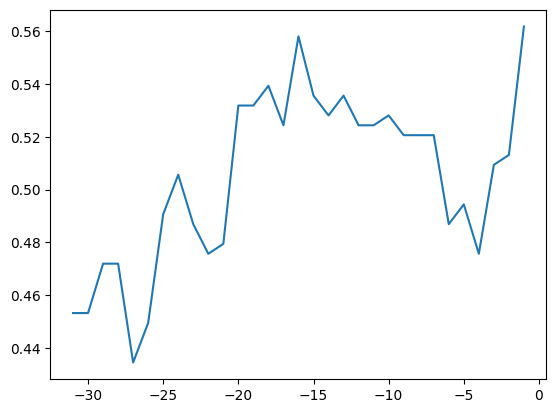

In [19]:
hidden_layers = get_hidden_layers(model)
H_tests = get_h_test(
    model, 
    rep_reading_pipeline, 
    rep_reader, 
    dataset
)
plot_correlation(rep_reader, H_tests, hidden_layers)

In [8]:
dataset['test']['data'][0]

"[INST] [/INST] There's a gray area when it comes to abortion. We discuss the #legal & #ethical #dilemmas that #doctors & #patients face regarding #SemST\nagainst\nIf you aren't responsible enough to take care of a baby, why are you having unprotected sex? #SemST\n"

  0%|          | 0/30 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 32
['negative', 'positive']
data len: 533
4 (82, 31)


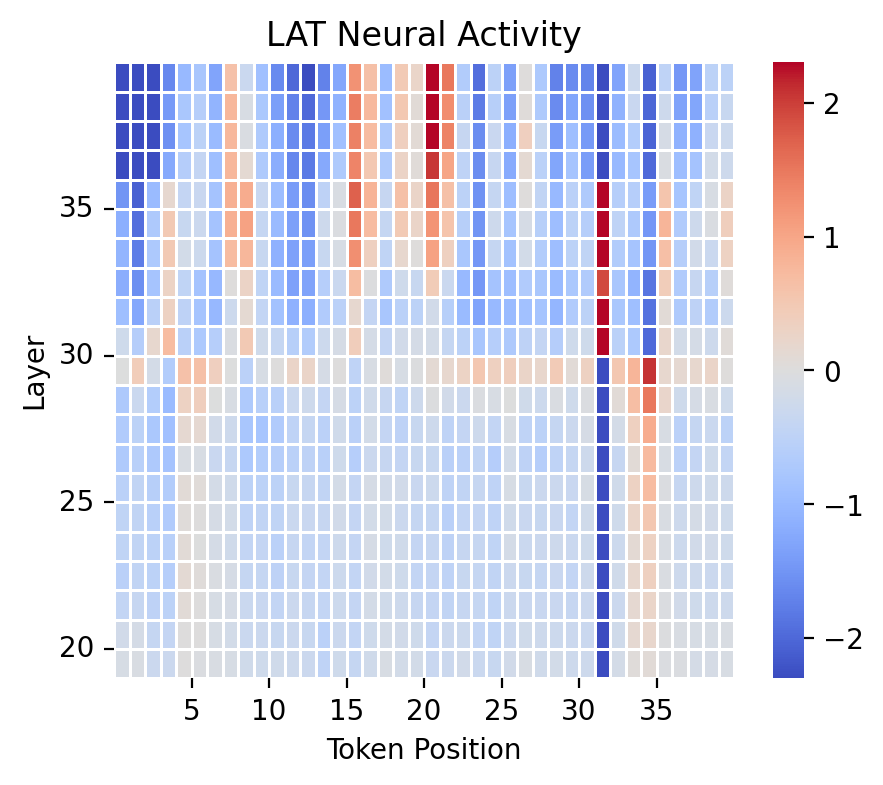

  3%|▎         | 1/30 [00:05<02:49,  5.83s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 32
['0', '1', 'hate', 'non-irony']
data len: 477
4 (96, 31)


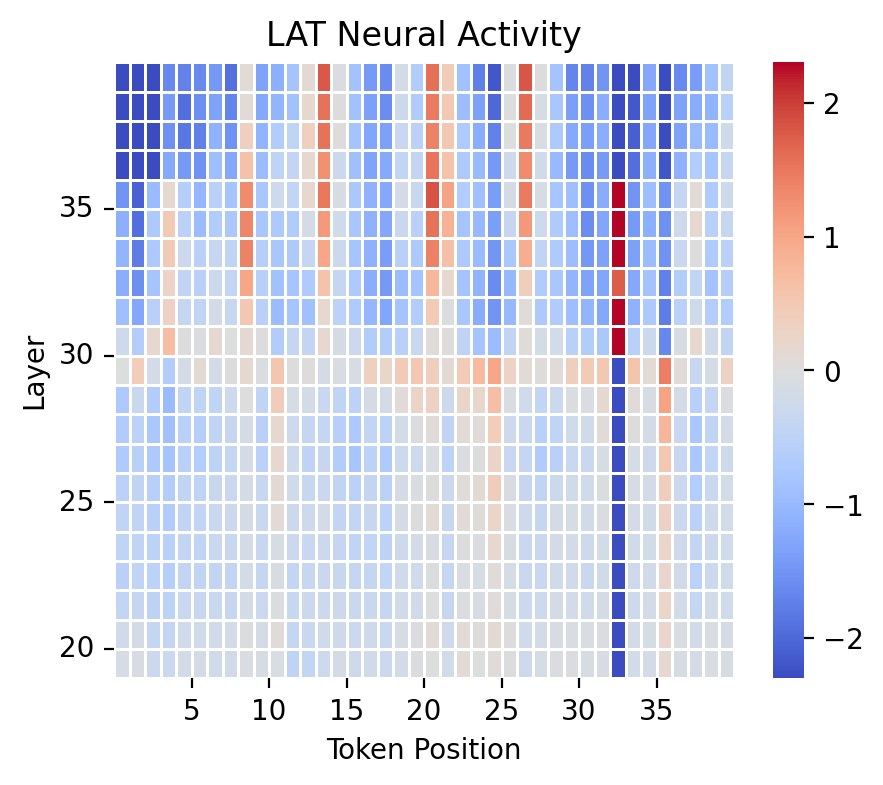

  7%|▋         | 2/30 [00:11<02:46,  5.94s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 107
4 (110, 31)


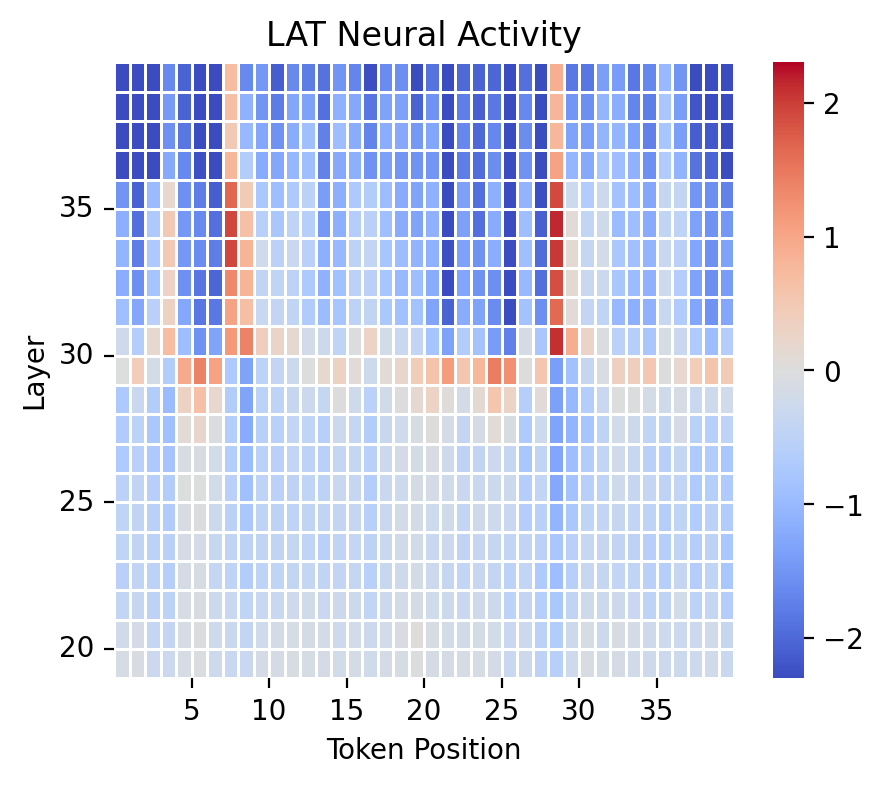

 10%|█         | 3/30 [00:17<02:42,  6.00s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for hate_speech18
['hate', 'noHate']
data len: 32
['hate', 'noHate']
data len: 1070
4 (98, 31)


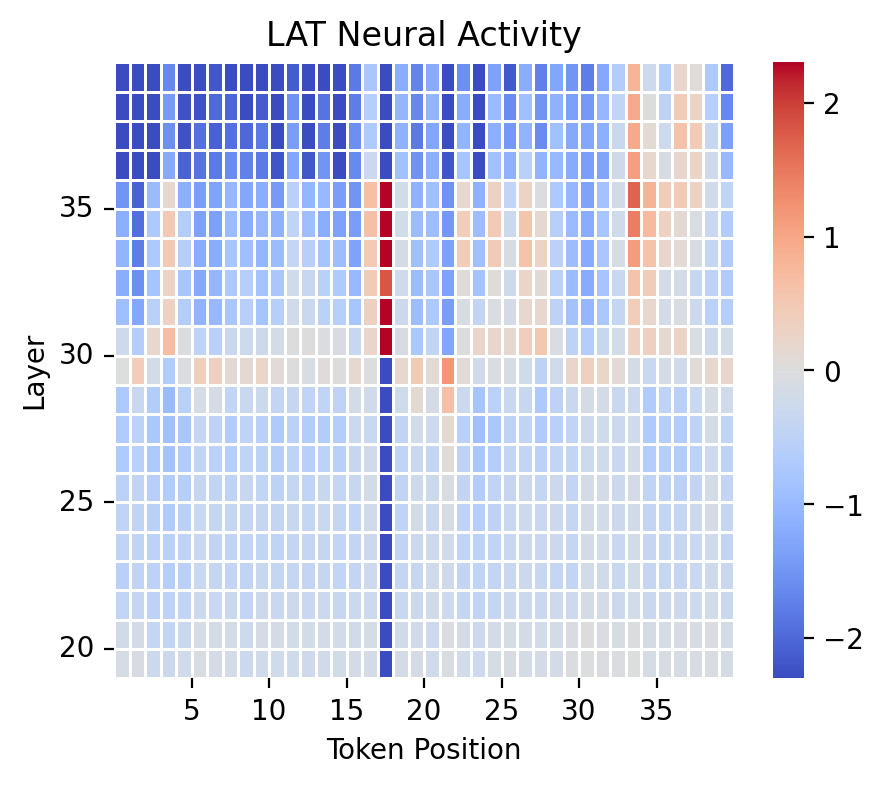

 13%|█▎        | 4/30 [00:23<02:28,  5.72s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 32
['entailment', 'not_entailment']
data len: 35
4 (112, 31)


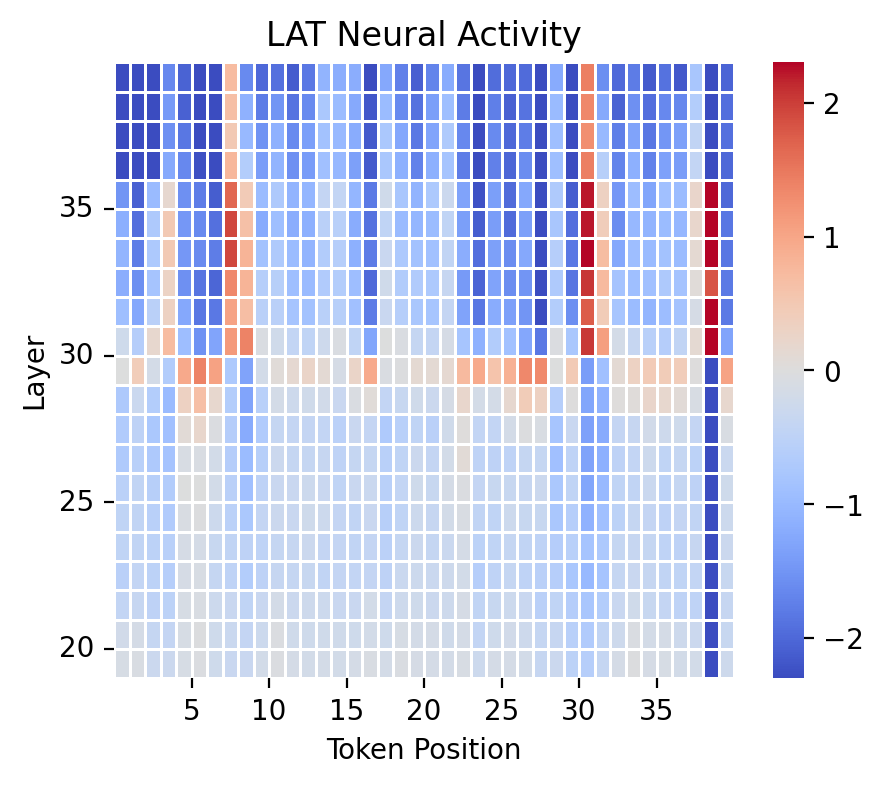

 17%|█▋        | 5/30 [00:30<02:37,  6.30s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 32
['hate', 'non-hate']
data len: 499
4 (133, 31)


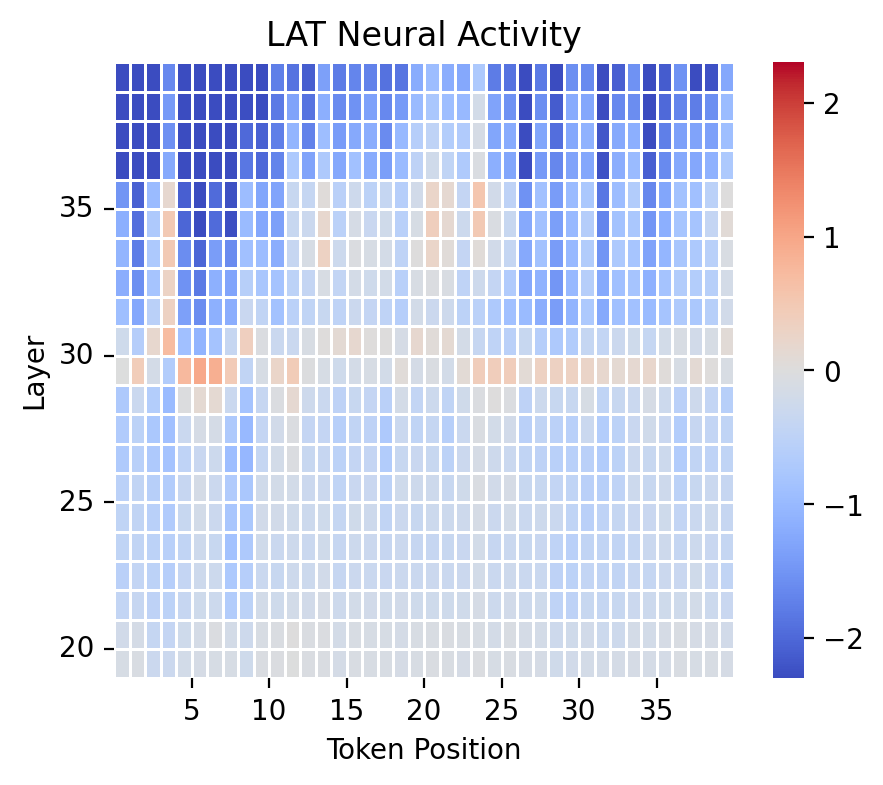

 20%|██        | 6/30 [00:38<02:47,  6.98s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 30
['contradiction', 'entailment', 'neutral']
data len: 25
4 (173, 31)


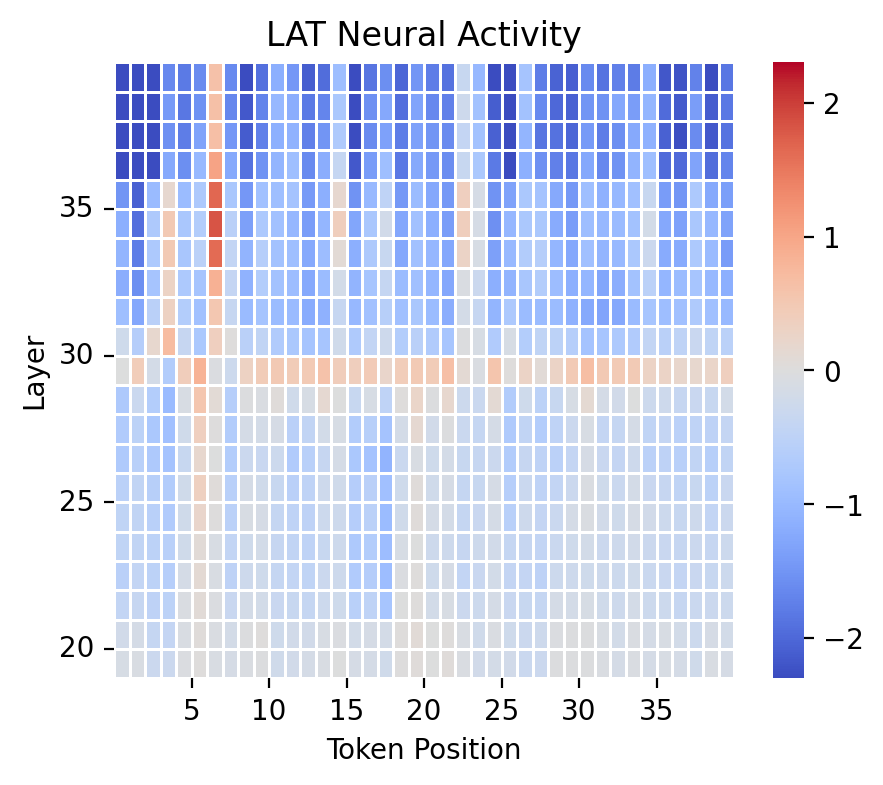

 23%|██▎       | 7/30 [00:48<02:57,  7.71s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 32
['entailment', 'not_entailment']
data len: 138
4 (170, 31)


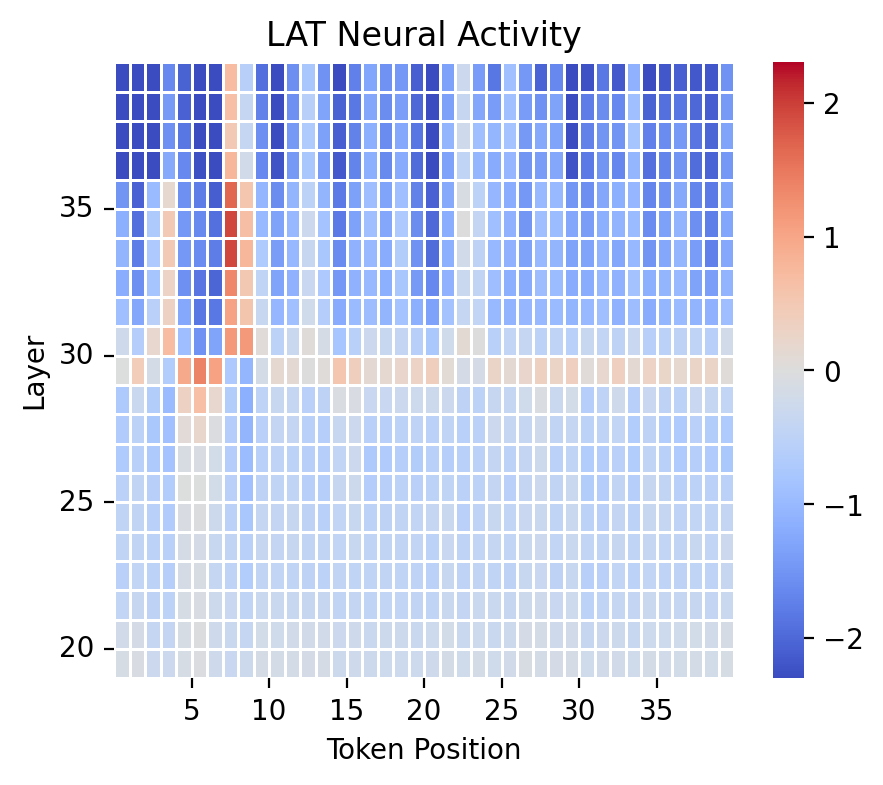

 27%|██▋       | 8/30 [00:59<03:14,  8.83s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 32
['equivalent', 'not_equivalent']
data len: 204
4 (161, 31)


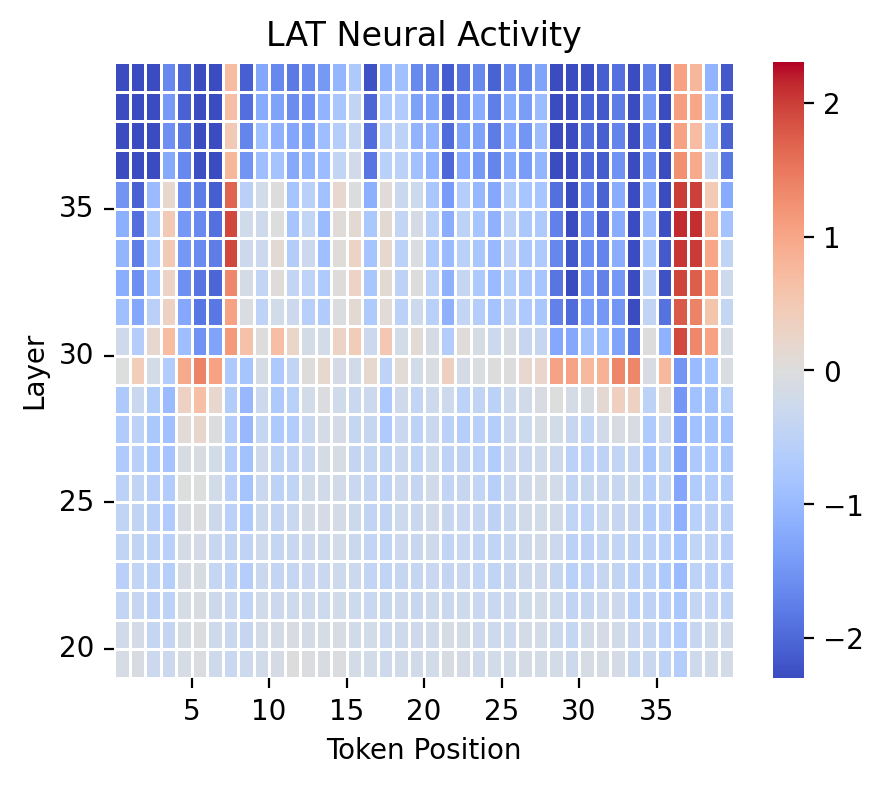

 30%|███       | 9/30 [01:08<03:09,  9.00s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 22
['against', 'favor', 'none']
data len: 20
4 (113, 31)


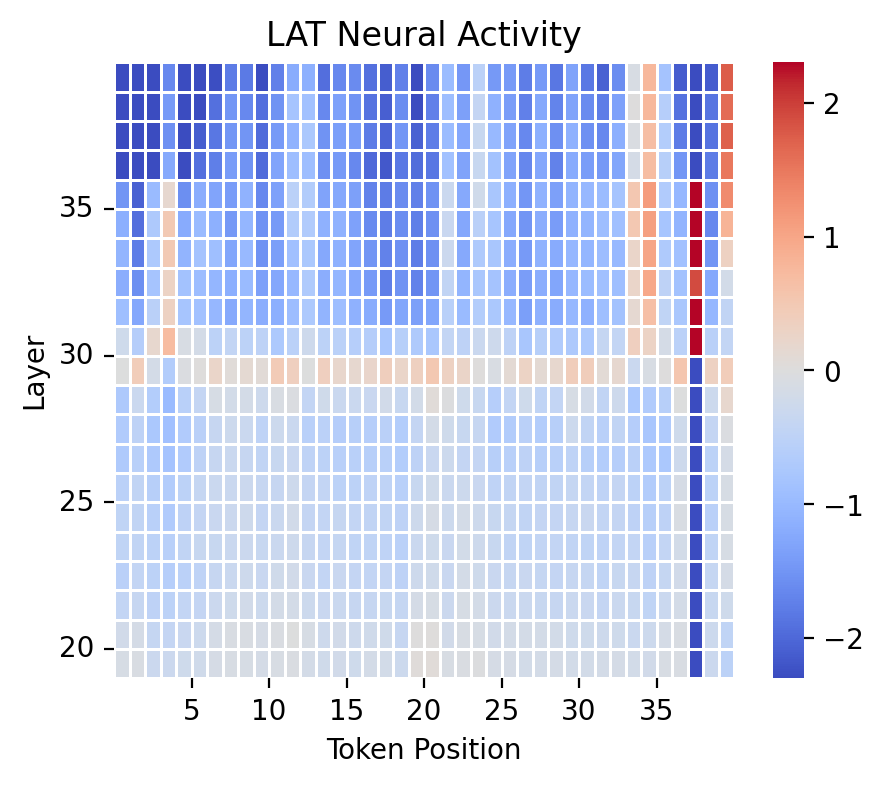

 33%|███▎      | 10/30 [01:16<02:50,  8.52s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ethos-race
['false', 'true']
data len: 32
['false', 'true']
data len: 43
4 (99, 31)


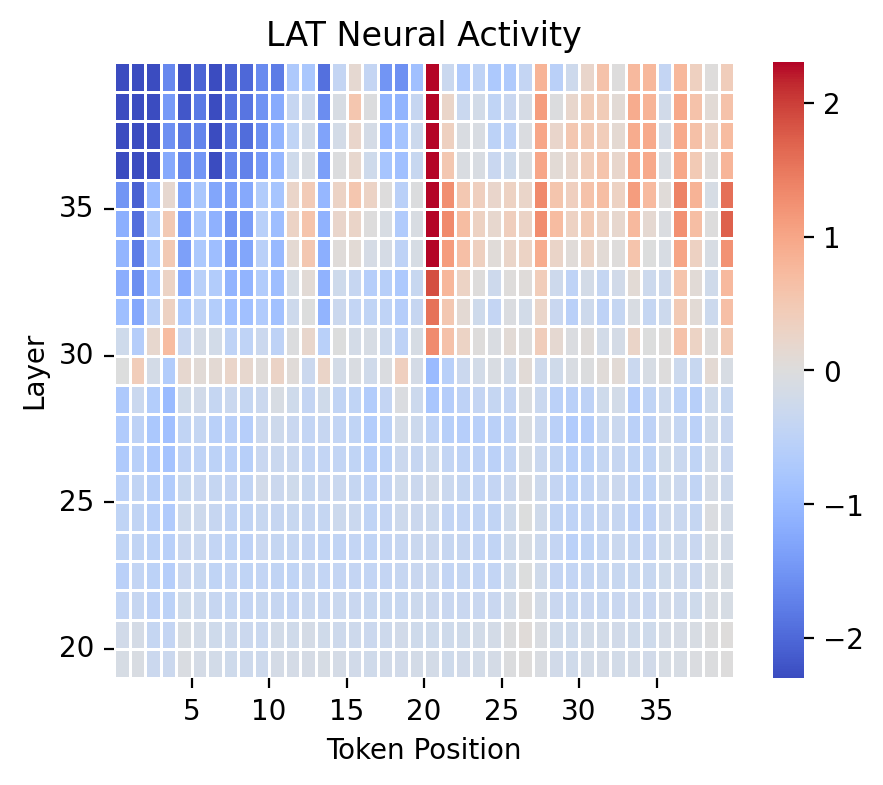

 37%|███▋      | 11/30 [01:21<02:24,  7.60s/it]

getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 32
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 2500


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


4 (75, 31)


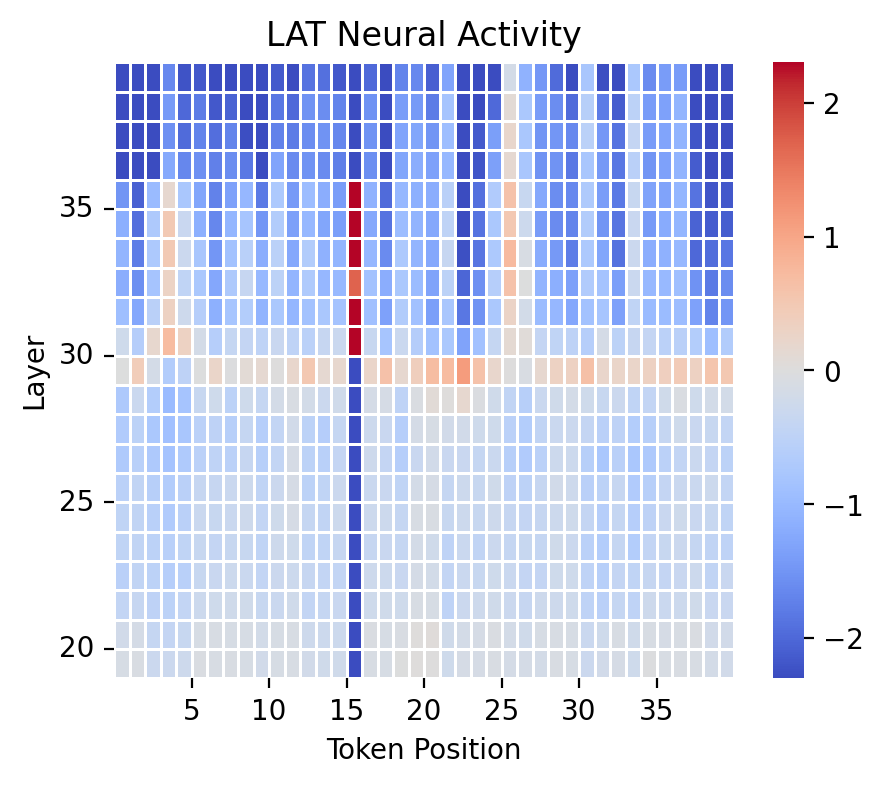

 40%|████      | 12/30 [01:25<01:58,  6.61s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 32
['false', 'true']
data len: 43
4 (99, 31)


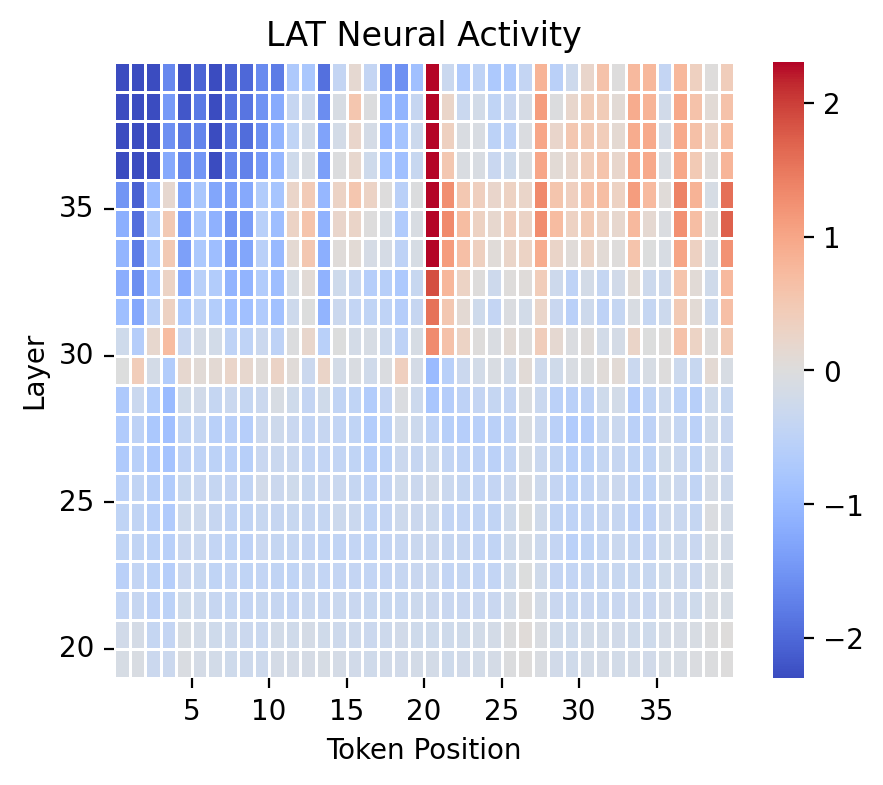

 43%|████▎     | 13/30 [01:32<01:50,  6.51s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 25
4 (106, 31)


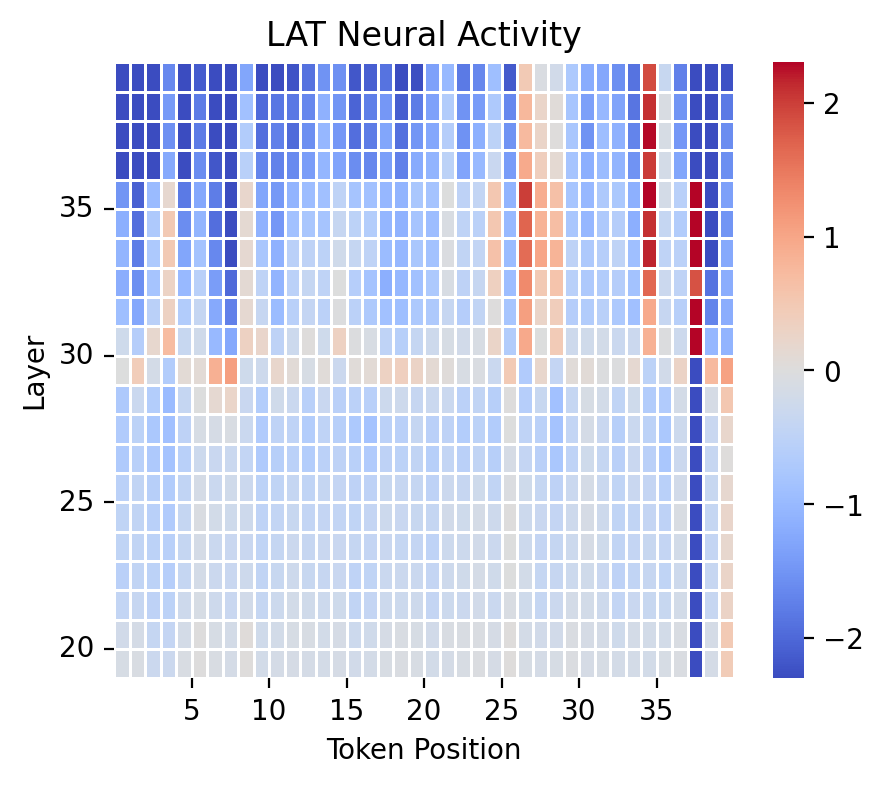

 47%|████▋     | 14/30 [01:38<01:41,  6.34s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 32
['directed', 'generalied']
data len: 43
4 (100, 31)


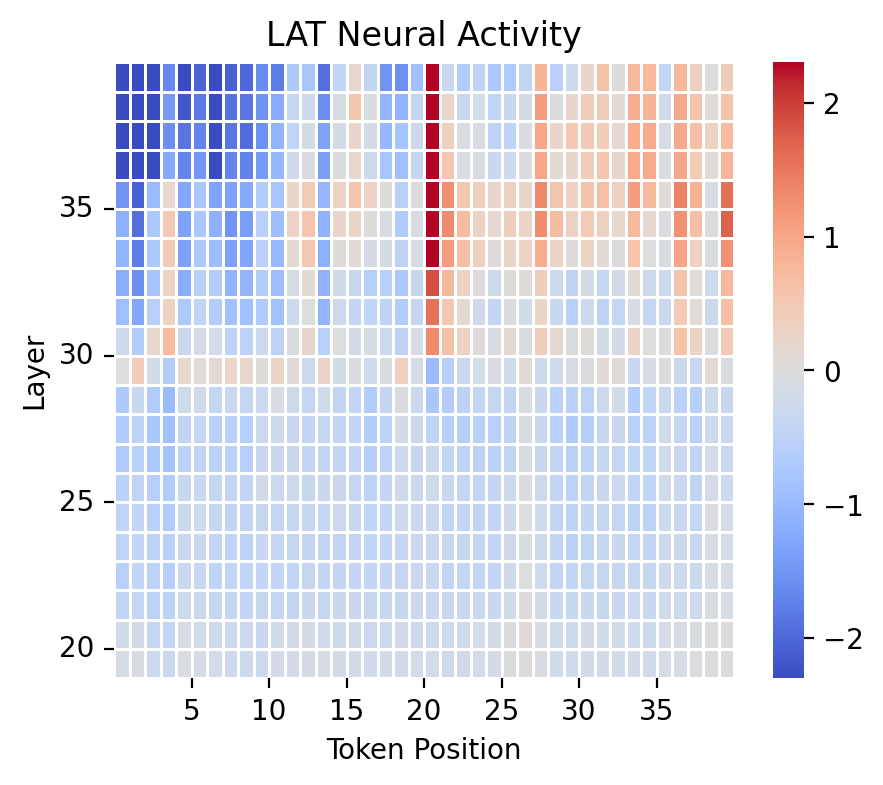

 50%|█████     | 15/30 [01:43<01:31,  6.10s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 32
['anger', 'joy', 'optimism', 'sadness']
data len: 187
4 (101, 31)


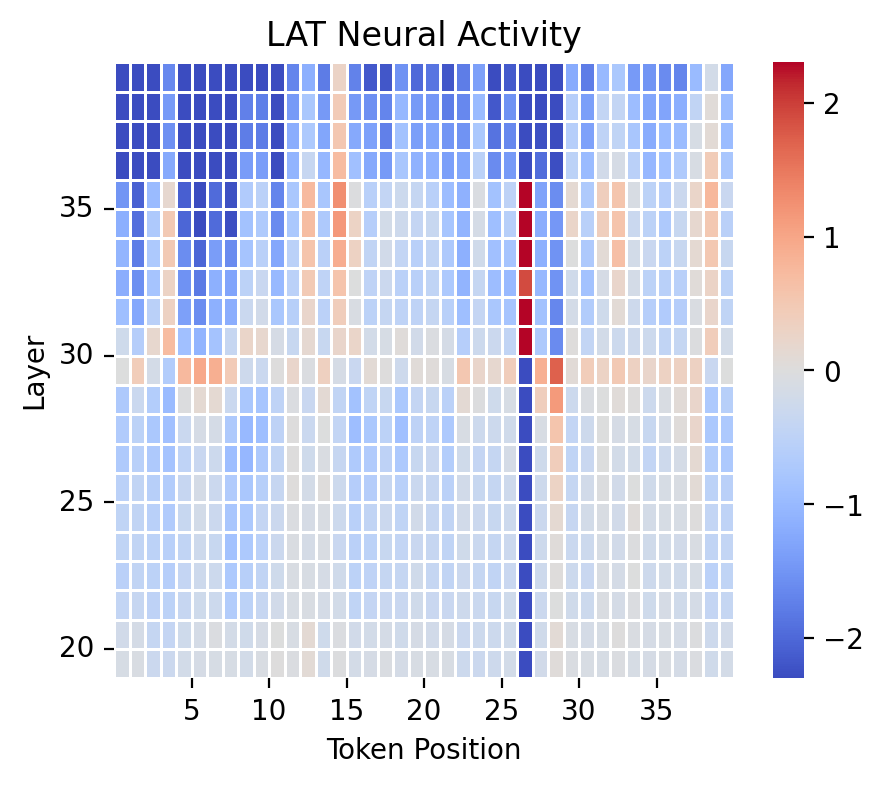

 53%|█████▎    | 16/30 [01:50<01:28,  6.33s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 27
4 (97, 31)


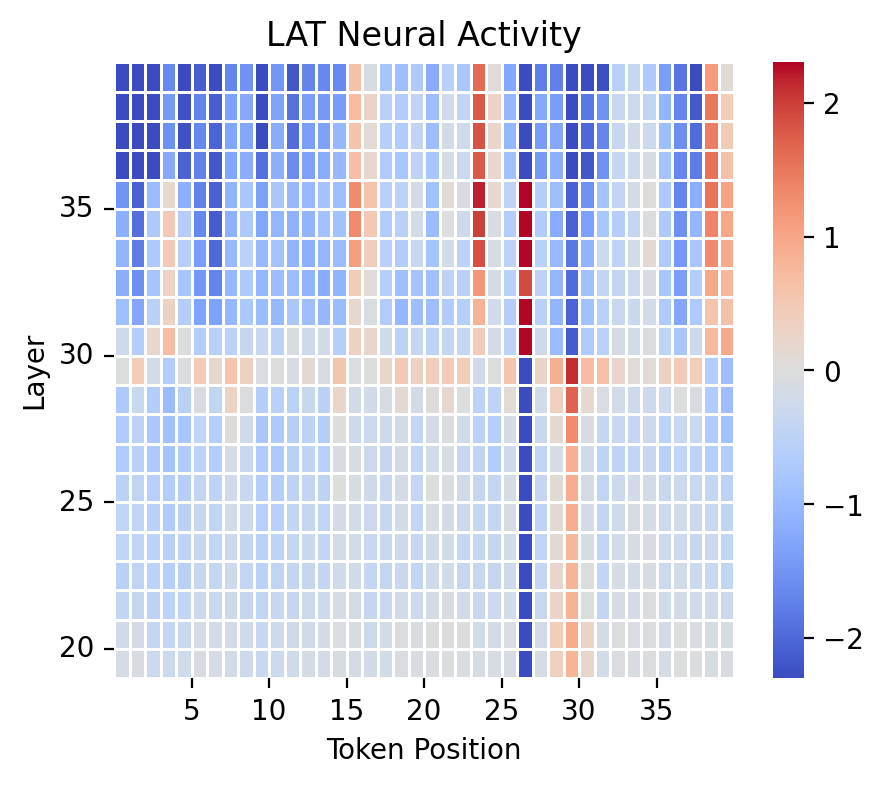

 57%|█████▋    | 17/30 [01:56<01:18,  6.08s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 20
['negative', 'neutral', 'positive']
data len: 565
4 (105, 31)


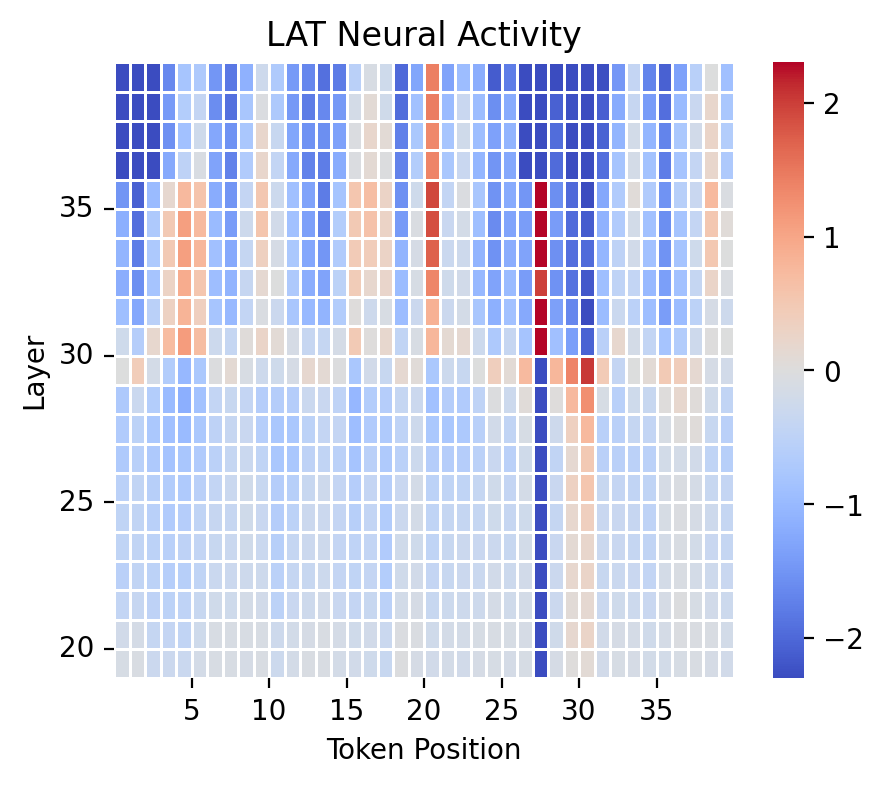

 60%|██████    | 18/30 [02:02<01:12,  6.07s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 83
4 (117, 31)


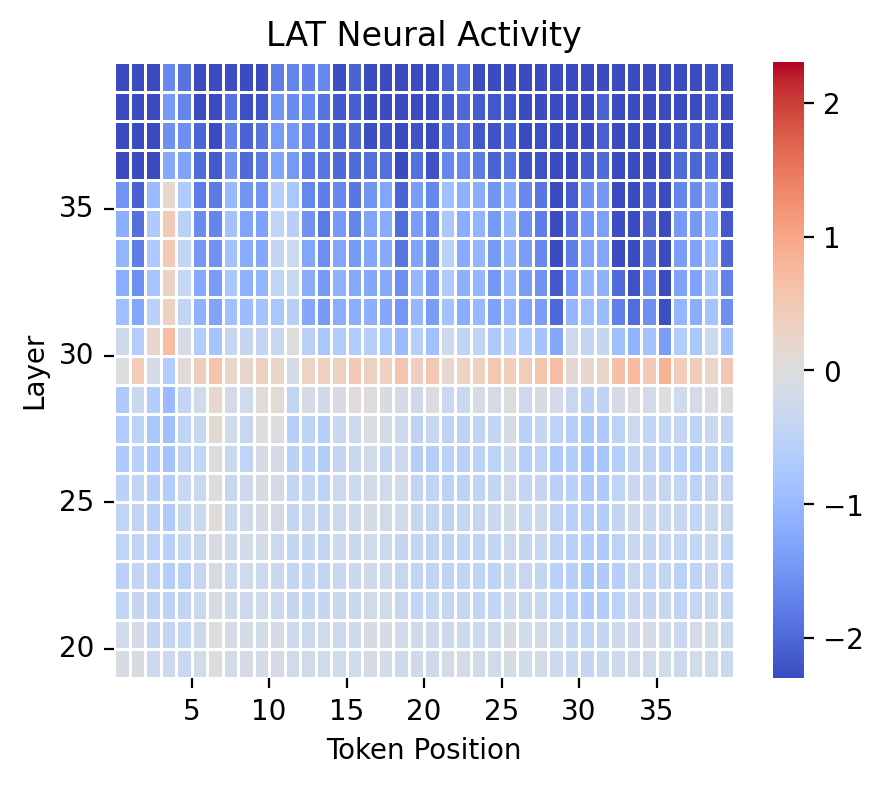

 63%|██████▎   | 19/30 [02:09<01:12,  6.56s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ethos-religion
['false', 'true']
data len: 32
['false', 'true']
data len: 43
4 (99, 31)


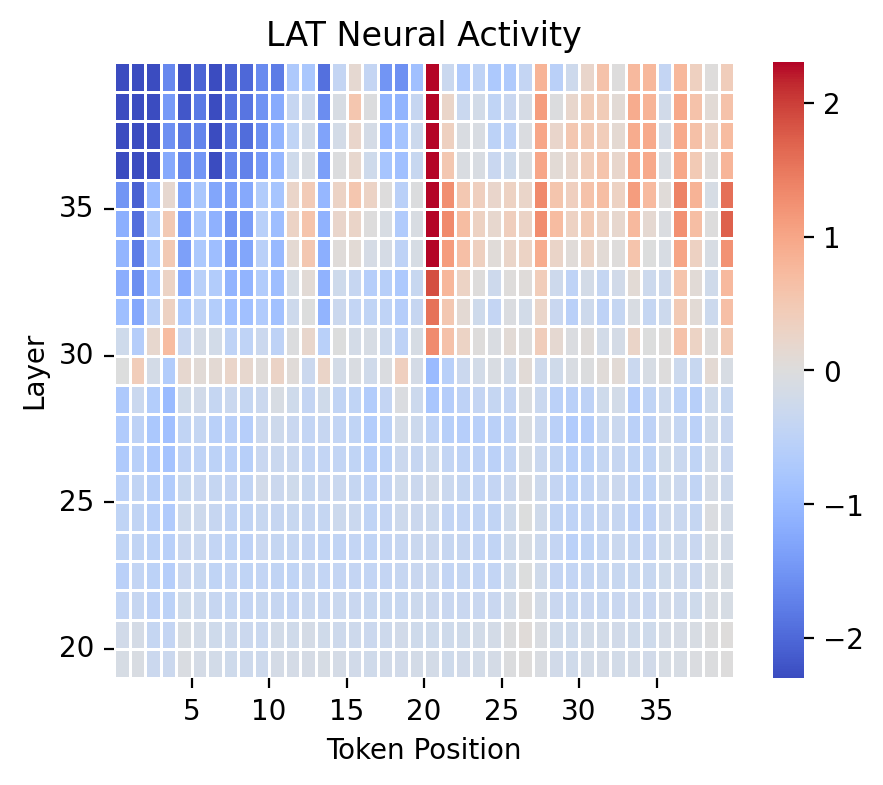

 67%|██████▋   | 20/30 [02:15<01:02,  6.27s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ethos-national_origin
['false', 'true']
data len: 32
['false', 'true']
data len: 43
4 (99, 31)


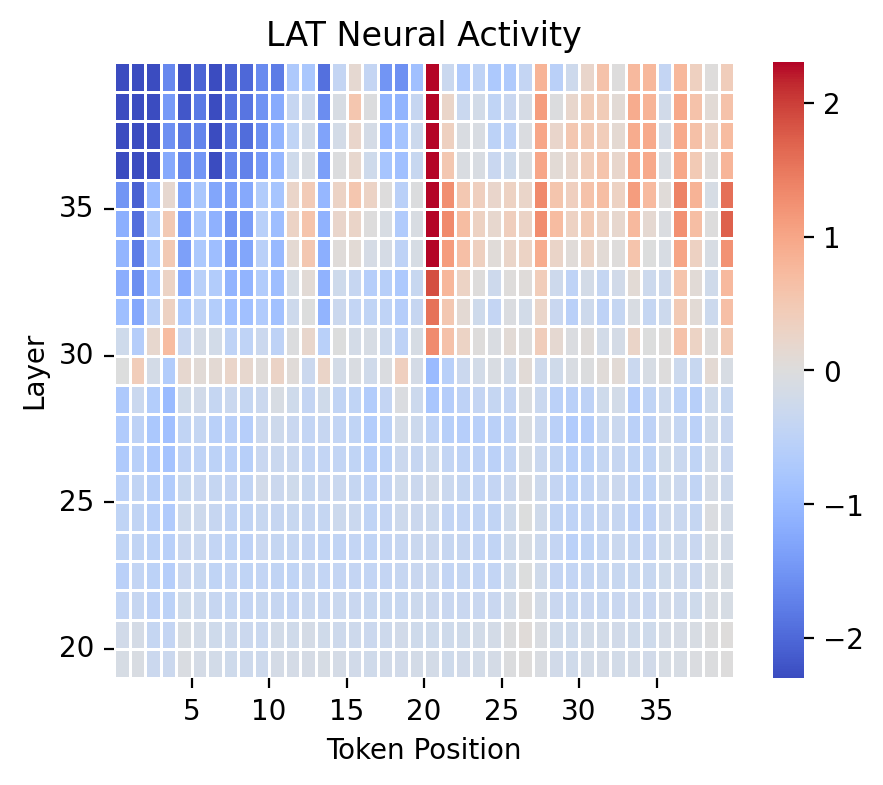

 70%|███████   | 21/30 [02:21<00:56,  6.30s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 32
['Dissimilar', 'Similar']
data len: 305
4 (275, 31)


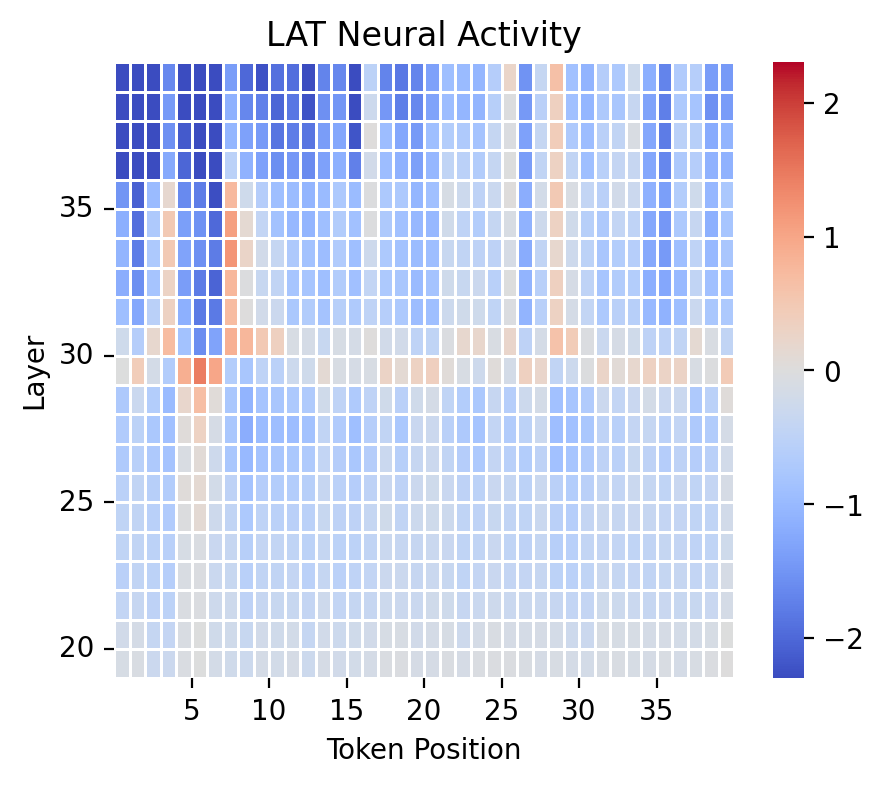

 73%|███████▎  | 22/30 [02:41<01:23, 10.39s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ethos-disability
['false', 'true']
data len: 32
['false', 'true']
data len: 43
4 (99, 31)


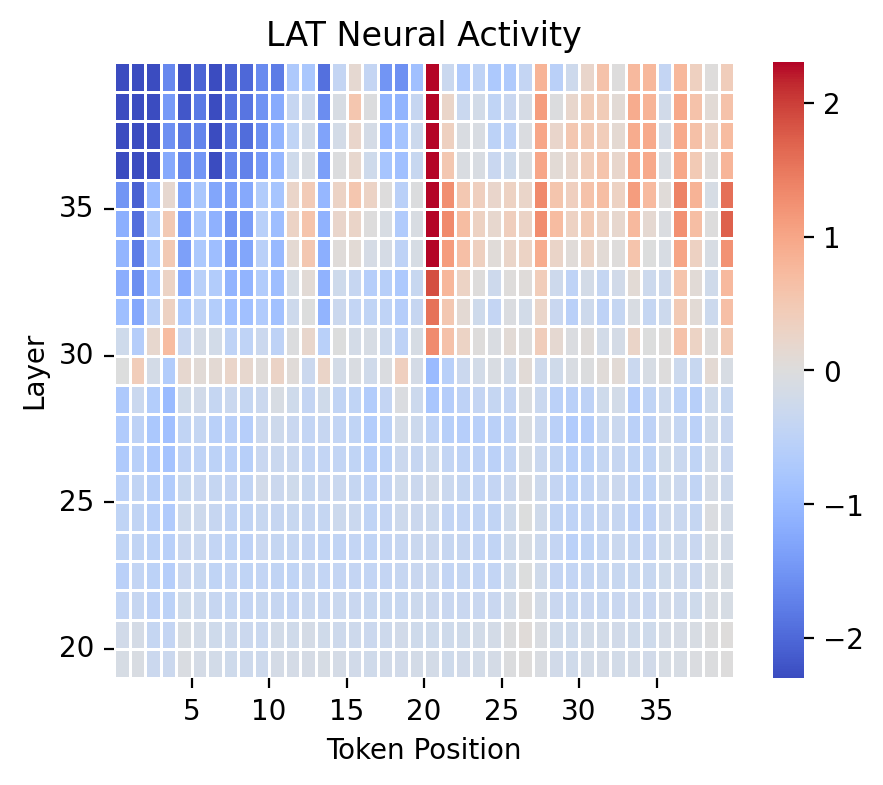

 77%|███████▋  | 23/30 [02:48<01:04,  9.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 32
['hate', 'non-offensive']
data len: 662
4 (84, 31)


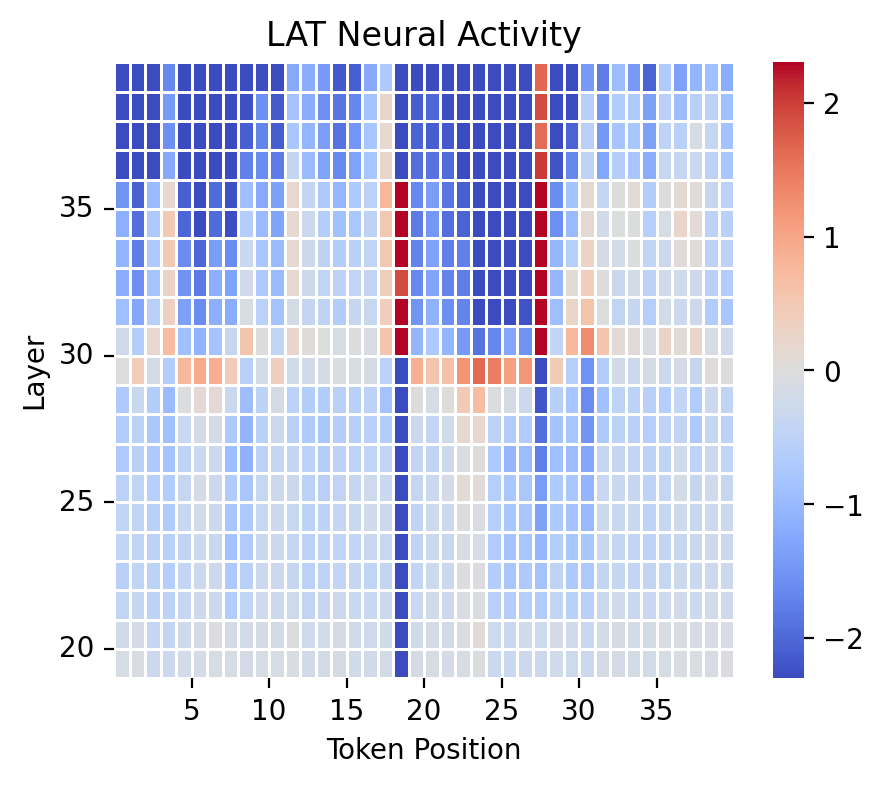

 80%|████████  | 24/30 [02:52<00:46,  7.83s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ethos-gender
['false', 'true']
data len: 32
['false', 'true']
data len: 43
4 (99, 31)


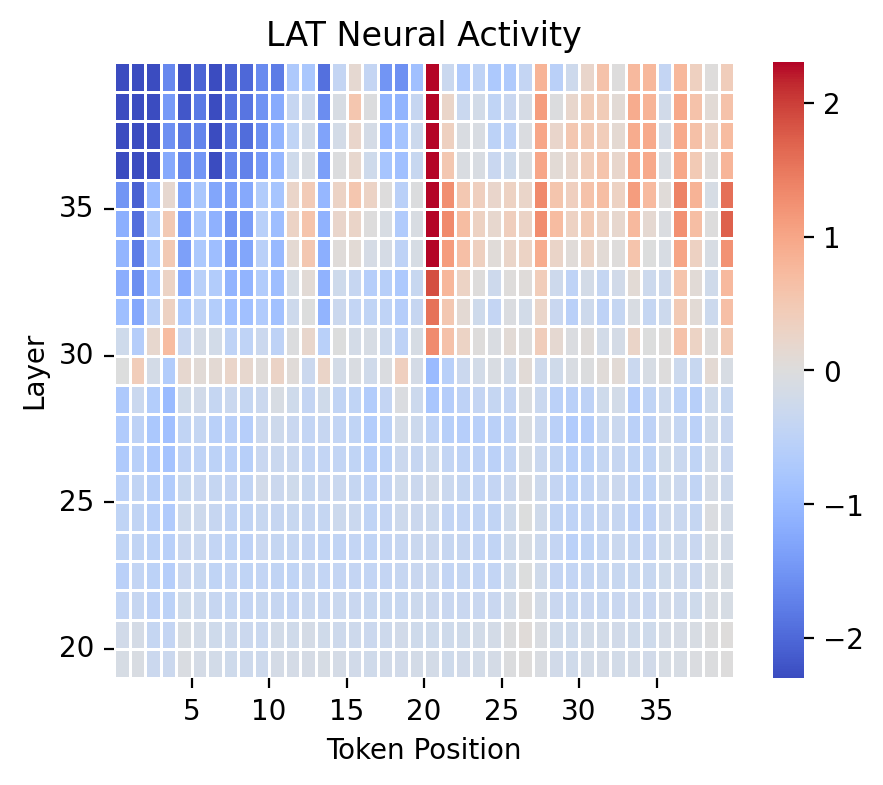

 83%|████████▎ | 25/30 [02:59<00:36,  7.39s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 18
4 (65, 31)


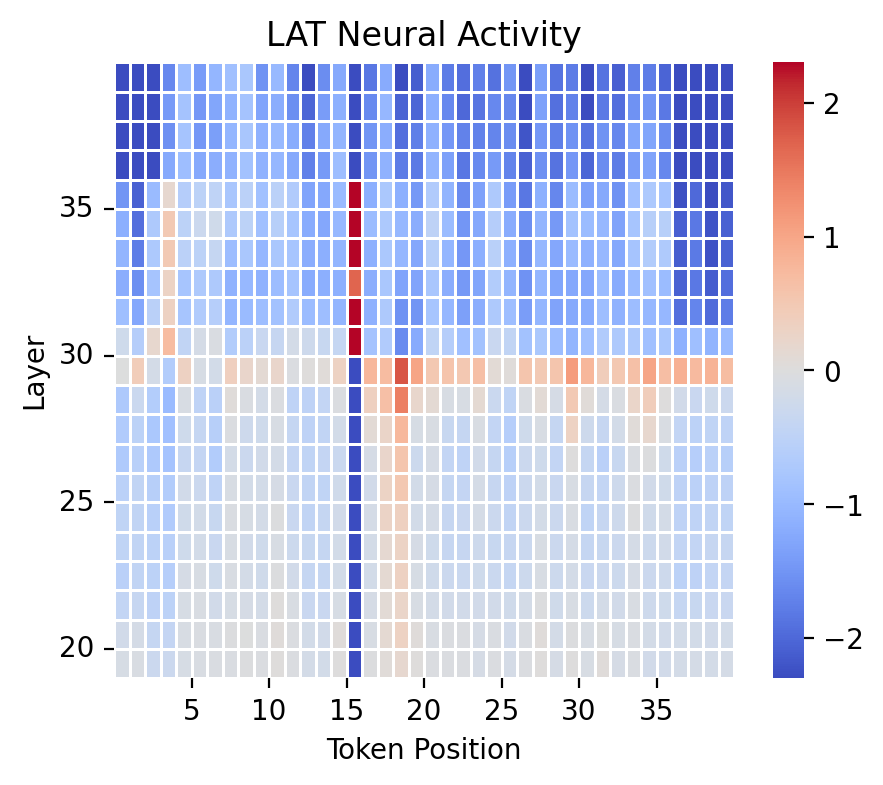

 87%|████████▋ | 26/30 [03:03<00:25,  6.40s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 32
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 153
4 (129, 31)


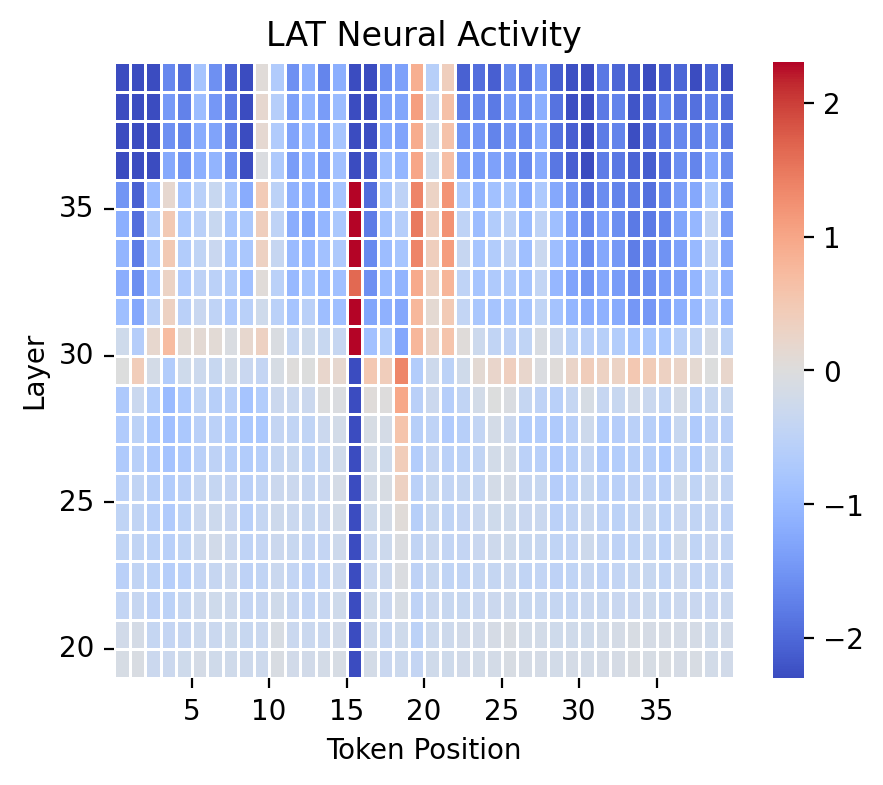

 90%|█████████ | 27/30 [03:11<00:20,  6.95s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11
4 (101, 31)


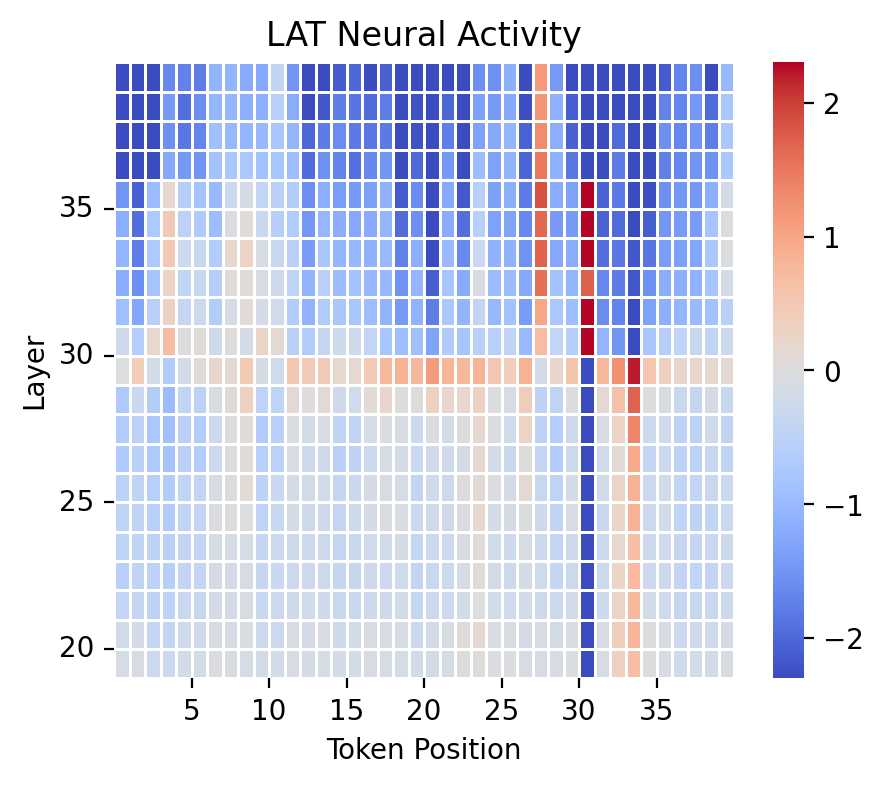

 93%|█████████▎| 28/30 [03:17<00:13,  6.71s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 32
['Not Related', 'Related']
data len: 2352
4 (135, 31)


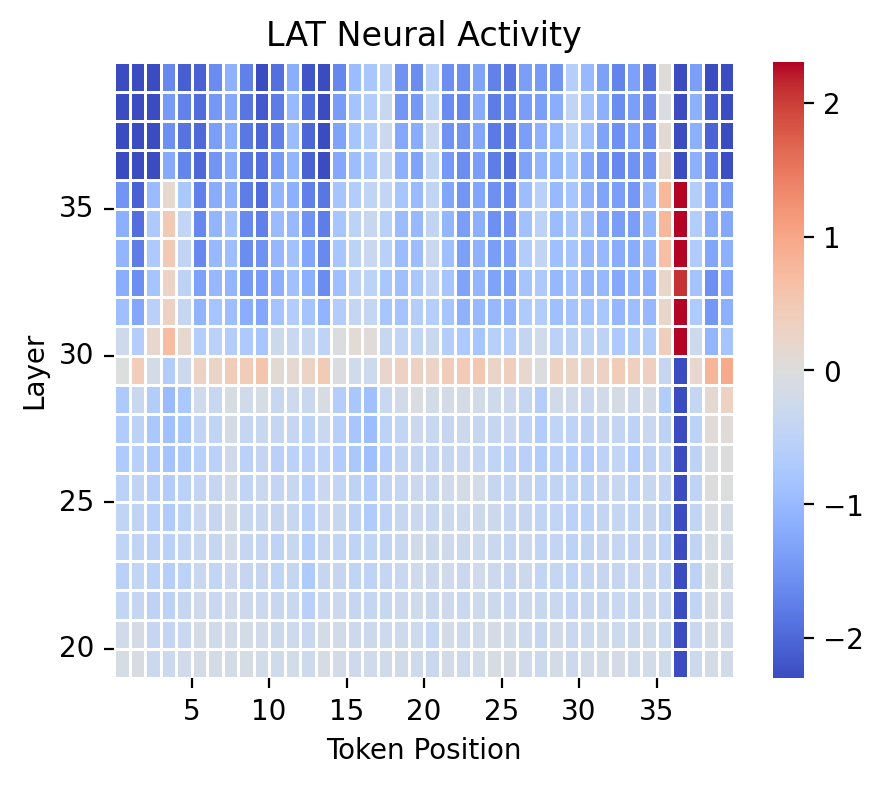

 97%|█████████▋| 29/30 [03:26<00:07,  7.22s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 24
4 (108, 31)


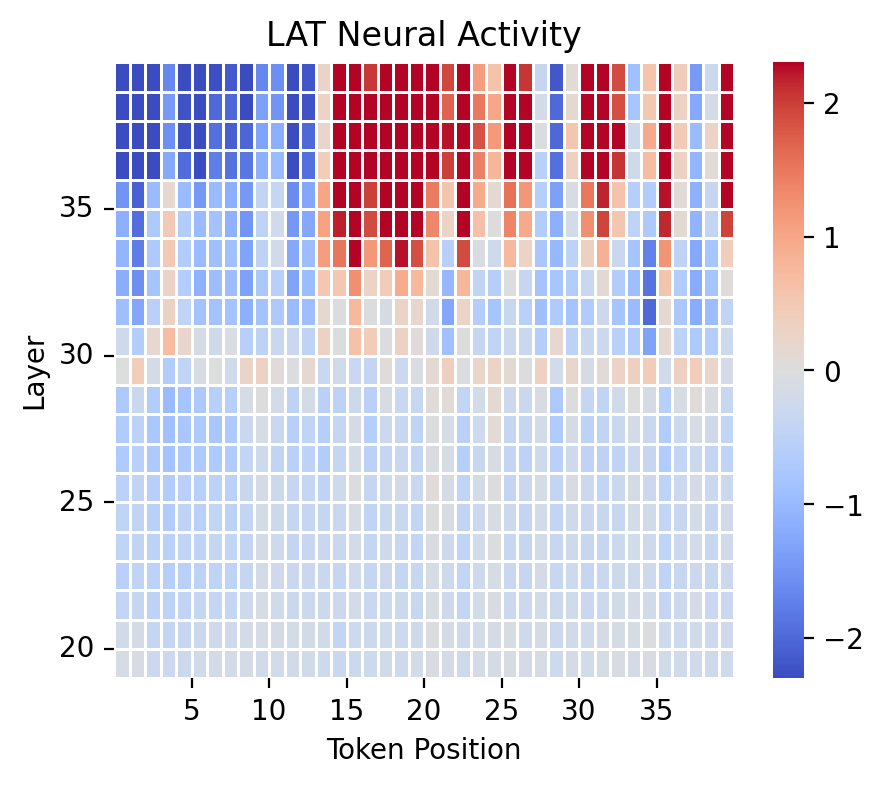

100%|██████████| 30/30 [03:32<00:00,  7.09s/it]


In [9]:

rep_reader_scores_dicts = {}
rep_reader_scores_mean_dicts = {}
for dataset_name in tqdm.tqdm(os.listdir('data')):
    dataset = get_task_dataset(dataset_name, tokenizer, positive_prompt, negative_prompt, ntrain=ntrain, test_num_examples=test_num_examples)
    data = dataset["test"]["data"][0]
    test_data = get_test_data(model, tokenizer, [data])
    wanted_layers = range(-10, -25, -1)
    rep_reader_scores_dicts[dataset_name], rep_reader_scores_mean_dicts[dataset_name] = get_rep_reader_scores_dict(model, tokenizer, 
                                                                                    rep_reading_pipeline, 
                                                                                    rep_reader, 
                                                                                    test_data, wanted_layers=wanted_layers )
    input_ids = tokenizer.tokenize(test_data[0])
    plot_lat_scans(input_ids, rep_reader_scores_dicts[dataset_name], layer_slice=slice(5, -5))
with open('rep_reader_scores_dicts.pickle', 'wb') as f:
    pickle.dump(rep_reader_scores_dicts, f)
with open('rep_reader_scores_mean_dicts.pickle', 'wb') as f:
    pickle.dump(rep_reader_scores_mean_dicts, f)

In [23]:
THRESHOLD = 0.0 # change this to alter sensitivity
input_ids = tokenizer.tokenize(test_data[0])

4 (103, 31)


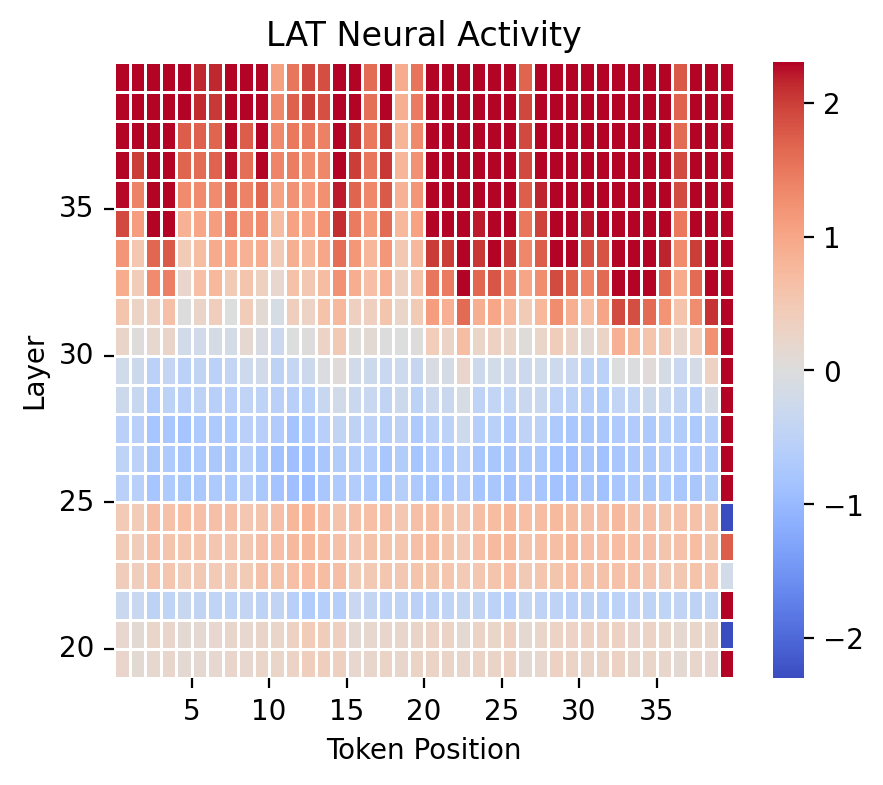

In [27]:
plot_lat_scans(input_ids, rep_reader_scores_dict, layer_slice=slice(5, -5))

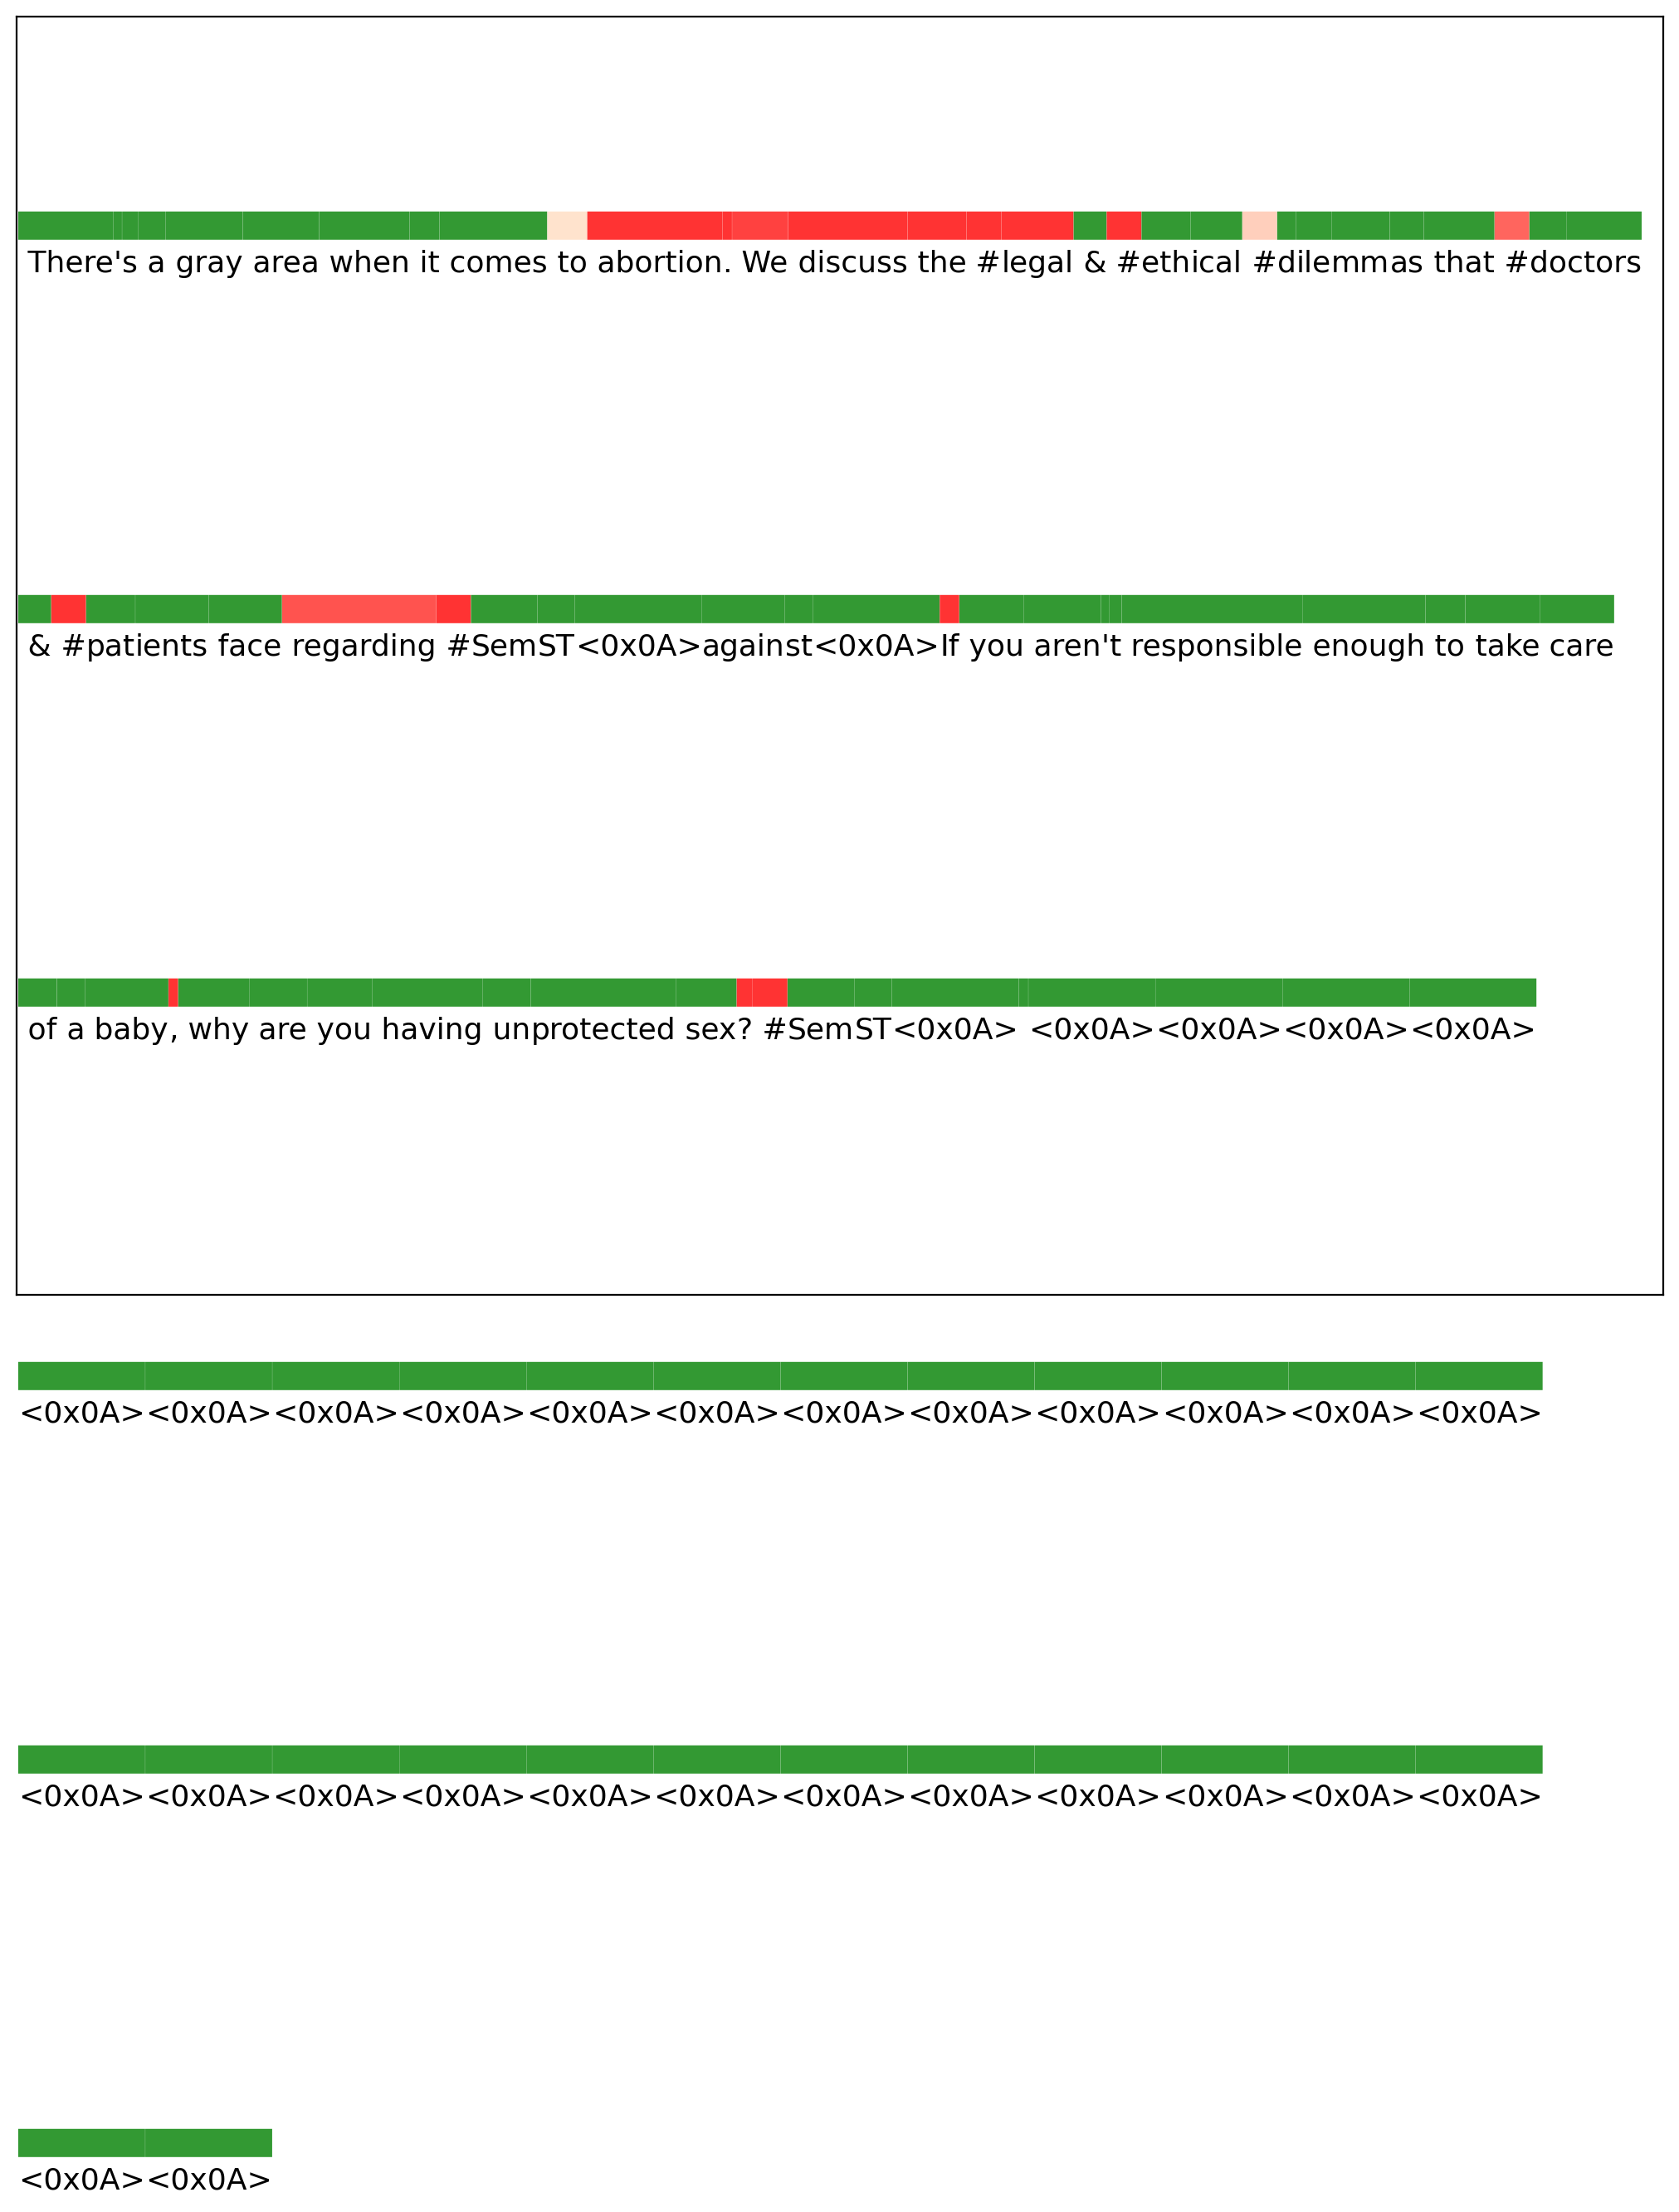

In [11]:
plot_detection_results(input_ids, rep_reader_scores_mean_dicts['tweet_eval-stance_abortion'], THRESHOLD=0.0, start_answer_token=tokenizer.tokenize(assistant_tag)[-1])

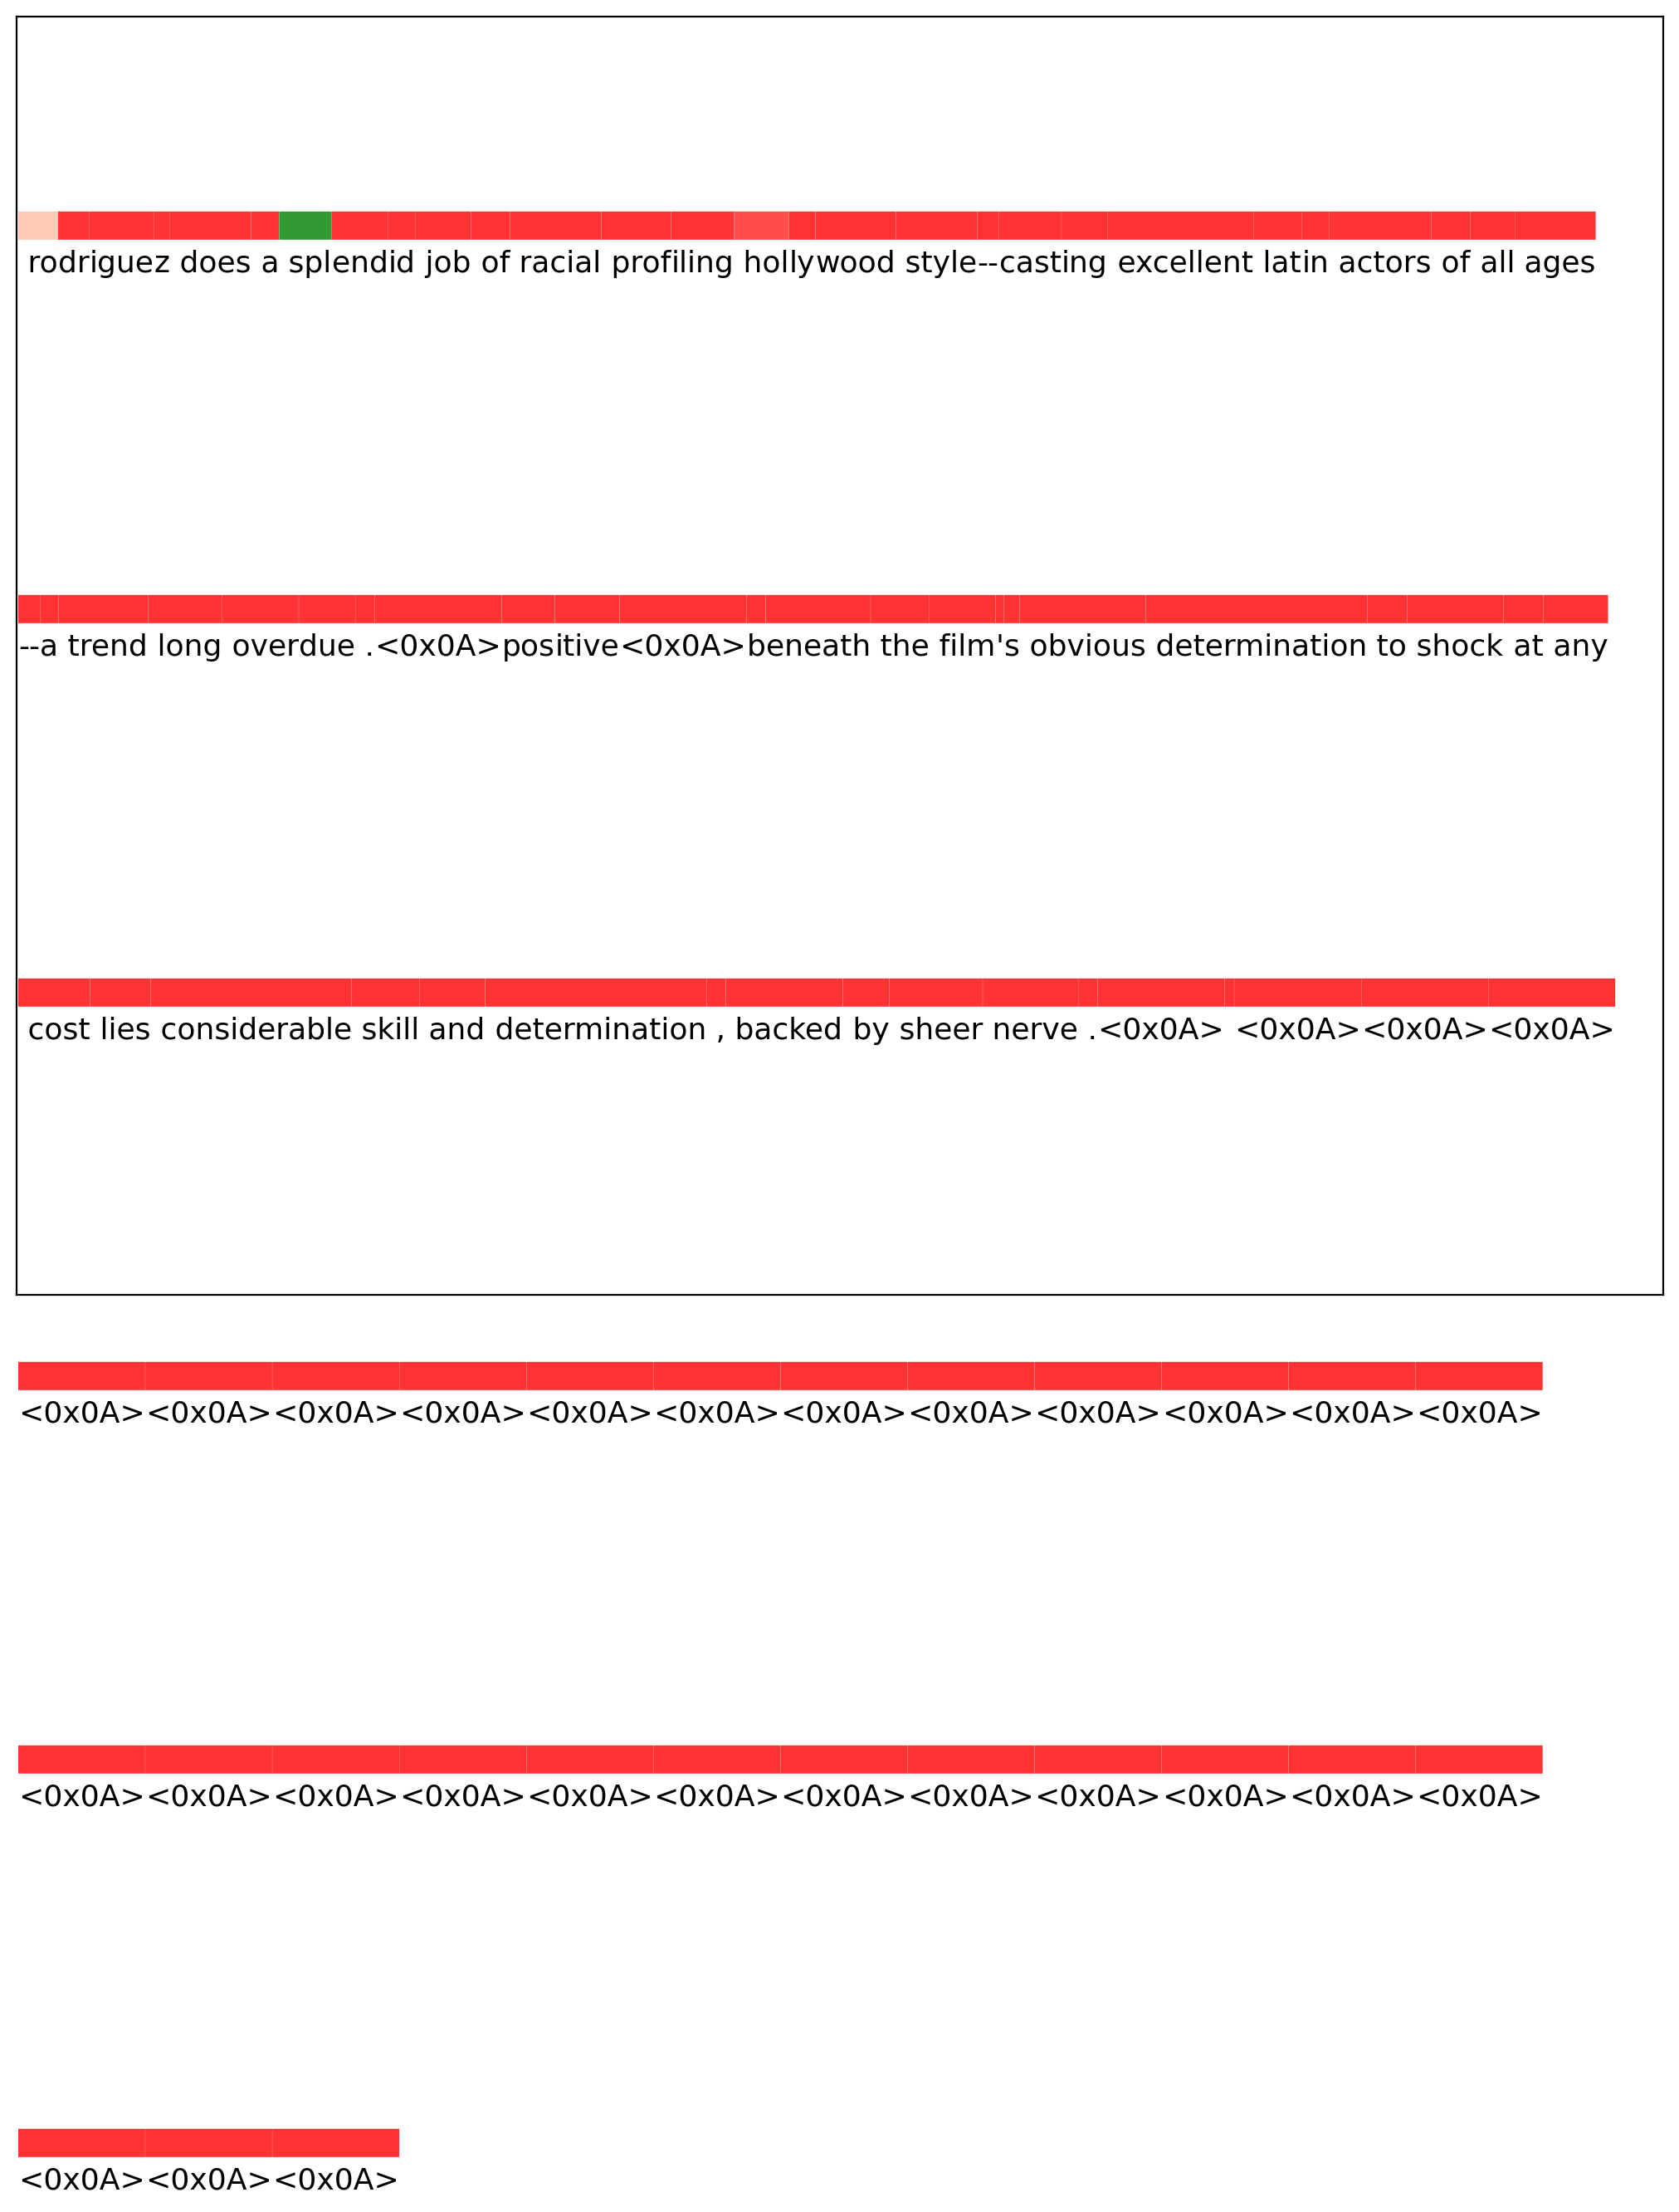

In [28]:
plot_detection_results(input_ids, rep_reader_scores_mean_dict, THRESHOLD, start_answer_token=tokenizer.tokenize(assistant_tag)[-1])

In [29]:

max_layer = -10
min_layer = -25

layer_id = list(range(max_layer, min_layer, -1))
rep_control = get_rep_control(model, tokenizer, layer_id)

In [21]:
from modules import *
baselines = {}
max_layer = -10
min_layer = -25
layer_id = list(range(max_layer, min_layer, -1))
ntrain = 64 
test_num_examples = 2
test_dataset_len = 16

for dataset_name in os.listdir('data'):
    dataset = get_task_dataset(dataset_name, tokenizer, positive_prompt, negative_prompt, ntrain=ntrain, test_num_examples=test_num_examples)
    rep_control = get_rep_control(model, tokenizer, layer_id)
    baselines[dataset_name] = get_rep_controlled_results_baseline(rep_reader, rep_control, dataset["test"]["data"][:test_dataset_len], None)


with open('dataset_baselines.pickle', 'wb') as f:
    pickle.dump(baselines, f)


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 32
['negative', 'positive']
data len: 533


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 32
['0', '1', 'hate', 'non-irony']
data len: 477


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 107


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for hate_speech18
['hate', 'noHate']
data len: 32
['hate', 'noHate']
data len: 1070


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 32
['entailment', 'not_entailment']
data len: 35


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 32
['hate', 'non-hate']
data len: 499


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 30
['contradiction', 'entailment', 'neutral']
data len: 25


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 32
['entailment', 'not_entailment']
data len: 138


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 32
['equivalent', 'not_equivalent']
data len: 204


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 22
['against', 'favor', 'none']
data len: 20


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ethos-race
['false', 'true']
data len: 32
['false', 'true']
data len: 43


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 32
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 2500


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 32
['false', 'true']
data len: 43


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 25


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 32
['directed', 'generalied']
data len: 43


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 32
['anger', 'joy', 'optimism', 'sadness']
data len: 187


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 27


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 20
['negative', 'neutral', 'positive']
data len: 565


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 83


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ethos-religion
['false', 'true']
data len: 32
['false', 'true']
data len: 43


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ethos-national_origin
['false', 'true']
data len: 32
['false', 'true']
data len: 43


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 32
['Dissimilar', 'Similar']
data len: 305


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ethos-disability
['false', 'true']
data len: 32
['false', 'true']
data len: 43


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 32
['hate', 'non-offensive']
data len: 662


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ethos-gender
['false', 'true']
data len: 32
['false', 'true']
data len: 43


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 18


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 32
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 153


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 32
['Not Related', 'Related']
data len: 2352


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 24
['against', 'favor', 'none']
data len: 24


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with baseline results!


In [ ]:
acc_dicts_baseline = {}
for dataset_name in os.listdir('data'):
    acc_dicts_baseline[dataset_name] = get_acc_dict(baselines[dataset_name], pos_results, neg_results, test_dataset["test"]["labels"])

In [26]:
pos_results = {}
neg_results = {}
max_layer = -10
min_layer = -25
layer_id = list(range(max_layer, min_layer, -1))
for dataset_name in os.listdir('data'):
    rep_reader = rep_readers[dataset_name]

    for test_dataset_name in os.listdir('data'):
        test_positive_prompt = "Pay attention to the following examples."
        test_negative_prompt = "Don't pay attention to the following exmaples."
        ntrain = 64 
        test_num_examples = 2
        test_dataset_len = 16
        user_tag = "[INST]"
        assistant_tag = "[/INST]"
        test_dataset = get_task_dataset(test_dataset_name, tokenizer, positive_prompt, negative_prompt, ntrain=test_dataset_len, test_num_examples=test_num_examples)
        rep_control = get_rep_control(model, tokenizer, layer_id)
        pos_results[(dataset_name, test_dataset_name)], neg_results[(dataset_name,test_dataset_name)] = get_rep_controlled_results_nobaseline(rep_reader, rep_control, test_dataset["test"]["data"], layer_id)
with open('cross_dataset_layer10-25_pos_results.pickle', 'wb') as f:
    pickle.dump(pos_results, f)
with open('cross_dataset_layer10-25_neg_results.pickle', 'wb') as f:
    pickle.dump(neg_results, f)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!
Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11
Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emotion
['anger', 'joy', 'optimism', 'sadness']
data len: 16
['anger', 'joy', 'optimism', 'sadness']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_feminist
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-sentiment
['negative', 'neutral', 'positive']
data len: 16
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for financial_phrasebank
['negative', 'neutral', 'positive']
data len: 8
['negative', 'neutral', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-religion
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-national_origin
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for medical_questions_pairs
['Dissimilar', 'Similar']
data len: 16
['Dissimilar', 'Similar']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-disability
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-offensive
['hate', 'non-offensive']
data len: 16
['hate', 'non-offensive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-gender
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for poem_sentiment
['negative', 'no_impact', 'positive']
data len: 12
['negative', 'no_impact', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for climate_fever
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16
['Disputed', 'Not enough info', 'Refutes', 'Supports']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_climate
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 11


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ade_corpus_v2-classification
['Not Related', 'Related']
data len: 16
['Not Related', 'Related']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_abortion
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for rotten_tomatoes
['negative', 'positive']
data len: 16
['negative', 'positive']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-irony
['0', '1', 'hate', 'non-irony']
data len: 16
['0', '1', 'hate', 'non-irony']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for sick
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for hate_speech18
['hate', 'noHate']
data len: 16
['hate', 'noHate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-wnli
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-hate
['hate', 'non-hate']
data len: 16
['hate', 'non-hate']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for superglue-cb
['contradiction', 'entailment', 'neutral']
data len: 16
['contradiction', 'entailment', 'neutral']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-rte
['entailment', 'not_entailment']
data len: 16
['entailment', 'not_entailment']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for glue-mrpc
['equivalent', 'not_equivalent']
data len: 16
['equivalent', 'not_equivalent']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_atheism
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-race
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-emoji
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16
['☀', '✨', '❤', '🇺🇸', '🎄', '💕', '💙', '💜', '💯', '📷', '📸', '🔥', '😁', '😂', '😉', '😊', '😍', '😎', '😘', '😜']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-sexual_orientation
['false', 'true']
data len: 16
['false', 'true']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for tweet_eval-stance_hillary
['against', 'favor', 'none']
data len: 16
['against', 'favor', 'none']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with neg control outputs
getting dataset for ethos-directed_vs_generalized
['directed', 'generalied']
data len: 16
['directed', 'generalied']
data len: 16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Done with control outputs!


KeyboardInterrupt: 

In [59]:
acc_dict = get_acc_dict(baseline, pos_results, neg_results, test_dataset["test"]["labels"])

Here are
The purpose
### Con
"I
The patient
The patient
```
After administer
The patient
###
The patient
###
The use
The patient
After the
The patient


In [60]:
acc_dict

{'baseline_acc': 0.062, 'pos_acc': 0.0, 'neg_acc': 0.0}

In [62]:
for a, b, c in zip(baseline, pos_results, neg_results): 
    print(a, b, c)
    print("-----")

The film Here are the film
-----
A new The purpose dont
-----
Not Related ### Con Not related to
-----
# "I not related to
-----
# The patient #
-----
It is The patient It is
-----
# ``` #
-----
this is After administer this is a
-----
this is The patient this is
-----
Crap ### Crap
-----
20 The patient 20
-----
Pot ### #
-----
Hep The use Hep
-----
this is the The patient this is the
-----
the l After the the worst
-----
Another The patient Another
-----
